In [1]:
'''
Created on Jul 16, 2017

@author: Matthew Gregory Krupa

Excluding IsBiHeap(), the functions given below  
are the minimum needed to biheapify a collection
of objects comparable objects.
For the commented versions of these functions 
containing explanations of the source code, 
see the C++ files biheapify_common.h, biheapify_even.h
biheapify_odd.h, and biheapify.h.
'''

def GetLeftChild(node):
    return (2 * node) + 1

def GetRightChild(node):
    return 2 * (node + 1)

def GetParentNotRoot(node):
    return (node - 1) // 2

def HeapSize(total_num_nodes):
    return total_num_nodes - (total_num_nodes // 3)

def PureHeapSize(total_num_nodes):
    return (total_num_nodes + 1) // 2

def GetOffsetOfFirstMinHeapInArrow(total_num_nodes, heap_size):
    return total_num_nodes - heap_size

def GetOffsetOfFirstMinHeapInArrow(total_num_nodes):
    return GetOffsetOfFirstMinHeapInArrow(total_num_nodes, HeapSize(total_num_nodes))

def GetNumNodesBetweenFistAndLastInArrows(total_num_nodes, offset_of_first_min_heap_in_arrow):
    return offset_of_first_min_heap_in_arrow + (total_num_nodes % 3)

def GetNumNodesBetweenFistAndLastInArrows(total_num_nodes):
    return GetNumNodesBetweenFistAndLastInArrows(total_num_nodes, GetOffsetOfFirstMinHeapInArrow(total_num_nodes))

#FlipCo is short for Flip Coordinate to (resp. from) an hc coordinate from (resp. to) an mc coordinate
def FlipCo(co, total_num_nodes):
    return total_num_nodes - 1 - co

def SiftUpMinHeapHC(li, pos_hc, smallest_node_in_biheap_hc):
    if pos_hc <= 0:
        return 
    parent = GetParentNotRoot(pos_hc)
    if parent < smallest_node_in_biheap_hc:
        return
    while True:
        if li[pos_hc] < li[parent]:
            li[pos_hc], li[parent] = li[parent], li[pos_hc]
            pos_hc = parent
        else:
            return
        if pos_hc <= 0:
            return
        parent = GetParentNotRoot(pos_hc)
        if parent < smallest_node_in_biheap_hc:
            return
    return

def SiftUpMaxHeapMC(li, total_num_nodes, pos_mc, smallest_node_in_biheap_mc):
    if pos_mc <= 0:
        return 
    parent_mc = GetParentNotRoot(pos_mc)
    if parent_mc < smallest_node_in_biheap_mc:
        return
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    parent_hc = FlipCo(parent_mc, total_num_nodes)
    while True:
        if li[pos_hc] > li[parent_hc]:
            li[pos_hc], li[parent_hc] = li[parent_hc], li[pos_hc]
            pos_mc = parent_mc
            pos_hc = parent_hc
        else:
            return
        if pos_mc <= 0:
            return
        parent_mc = GetParentNotRoot(pos_mc)
        if parent_mc < smallest_node_in_biheap_mc:
            return
        parent_hc = FlipCo(parent_mc, total_num_nodes)
    return

def SiftUpMaxHeapHC(li, total_num_nodes, pos_hc, smallest_node_in_biheap_mc):
    SiftUpMaxHeapMC(li, total_num_nodes, FlipCo(pos_hc, total_num_nodes), smallest_node_in_biheap_mc)
    return 
        
def SiftFromMinToMax(li, total_num_nodes, heap_size, first_node_in_mirror_heap, pos_hc, largest_node_in_biheap_hc):
    while pos_hc < first_node_in_mirror_heap:
        left_child_hc   = GetLeftChild(pos_hc)
        right_child_hc  = left_child_hc + 1
        smaller_hc      = None
        is_right_child_valid = right_child_hc < heap_size and right_child_hc <= largest_node_in_biheap_hc
        if is_right_child_valid and (li[right_child_hc] < li[left_child_hc]):
            smaller_hc = right_child_hc
        else:
            smaller_hc = left_child_hc
        if li[pos_hc] > li[smaller_hc]:
            li[pos_hc], li[smaller_hc] = li[smaller_hc], li[pos_hc]
            pos_hc = smaller_hc
        else:
            return
    SiftUpMaxHeapMC(li, total_num_nodes, FlipCo(pos_hc, total_num_nodes), FlipCo(largest_node_in_biheap_hc, total_num_nodes))
    return

def SiftFromMaxToMin(li, total_num_nodes, heap_size, first_node_in_mirror_heap, pos_mc, smallest_node_in_biheap_hc):
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    while pos_mc < first_node_in_mirror_heap:
        left_child_mc  = GetLeftChild(pos_mc)
        right_child_mc = left_child_mc + 1
        left_child_hc  = FlipCo(left_child_mc, total_num_nodes)
        right_child_hc = left_child_hc - 1
        larger_hc      = None
        is_right_child_valid = right_child_mc < heap_size
        if is_right_child_valid and (li[right_child_hc] > li[left_child_hc]):
            larger_hc = right_child_hc
            pos_mc    = right_child_mc
        else:
            larger_hc = left_child_hc
            pos_mc    = left_child_mc
        if li[pos_hc] < li[larger_hc]:
            li[pos_hc], li[larger_hc] = li[larger_hc], li[pos_hc]
            pos_hc = larger_hc
        else:
            return
    SiftUpMinHeapHC(li, pos_hc, smallest_node_in_biheap_hc)
    return

def BiHeapify(li, total_num_nodes):
    if total_num_nodes < 2:
        return
    heap_size = HeapSize(total_num_nodes)
    first_node_in_mirror_heap = total_num_nodes - heap_size
    largest_node_in_biheap_hc = heap_size - 1
    if total_num_nodes % 3 == 2:
        largest_node_in_biheap_hc = largest_node_in_biheap_hc - 1
    smallest_node_in_biheap_hc = FlipCo(largest_node_in_biheap_hc, total_num_nodes)
    
    while smallest_node_in_biheap_hc > 0:
        smallest_node_in_biheap_hc = smallest_node_in_biheap_hc - 1
        SiftFromMinToMax(li, total_num_nodes, heap_size, first_node_in_mirror_heap, smallest_node_in_biheap_hc, largest_node_in_biheap_hc)
        largest_node_in_biheap_hc = largest_node_in_biheap_hc + 1
        SiftFromMaxToMin(li, total_num_nodes, heap_size, first_node_in_mirror_heap, FlipCo(largest_node_in_biheap_hc, total_num_nodes), smallest_node_in_biheap_hc)
    return

def BiHeapifySub(li, start_index, total_num_nodes):
    sublist = li[start_index:start_index + total_num_nodes]
    BiHeapify(sublist, total_num_nodes)
    li[start_index:start_index + total_num_nodes] = sublist
    return
        
def IsBiheap(li, total_num_nodes):
    if total_num_nodes <= 3:
        if total_num_nodes <= 1:
            return True
        elif total_num_nodes == 2:
            return li[0] <= li[1]
        else:
            return li[0] <= li[1] and li[1] <= li[2]
    heap_size = HeapSize(total_num_nodes)
    #Check that the first heap_size nodes form a min heap.
    i = 0
    right_child = GetRightChild(i)
    while right_child < heap_size:
        if li[i] > li[right_child - 1]:
            return False
        if li[i] > li[right_child]:
            return False
        i = i + 1
        right_child = GetRightChild(i)
    #if the min heap has a single left child then check that it satisfies the min heap condition.
    left_child = GetLeftChild(i)
    if (left_child < heap_size and li[i] > li[left_child]):
        return False
    #Check that the last heap_size nodes form a max heap.
    i_mc = 0
    right_child_mc = GetRightChild(i_mc)
    while right_child_mc < heap_size:
        i_hc = FlipCo(i_mc, total_num_nodes)
        right_child_hc = FlipCo(right_child_mc, total_num_nodes)
        left_child_hc = FlipCo(right_child_mc - 1, total_num_nodes)
        if li[i_hc] < li[left_child_hc]:
            return False
        if li[i_hc] < li[right_child_hc]:
            return False
        i_mc = i_mc + 1
        right_child_mc = GetRightChild(i_mc)
    #if the max heap has a single left child then check that it satisfies the max heap condition.
    left_child_mc = GetLeftChild(i_mc)
    left_child_hc = FlipCo(left_child_mc, total_num_nodes)
    i_hc = FlipCo(i_mc, total_num_nodes)
    if (left_child_mc < heap_size and li[i_hc] < li[left_child_hc]):
        return False
    return True

################################################################
#Begin: BiHeapify() With Start Offset
################################################################

def SiftUpMinHeapHCWithOffset(li, start_offset, pos_hc, smallest_node_in_biheap_hc):
    if pos_hc <= 0:
        return 
    parent = GetParentNotRoot(pos_hc)
    if parent < smallest_node_in_biheap_hc:
        return
    while True:
        if li[start_offset + pos_hc] < li[start_offset + parent]:
            li[start_offset + pos_hc], li[start_offset + parent] = li[start_offset + parent], li[start_offset + pos_hc]
            pos_hc = parent
        else:
            return
        if pos_hc <= 0:
            return
        parent = GetParentNotRoot(pos_hc)
        if parent < smallest_node_in_biheap_hc:
            return
    return

def SiftUpMaxHeapMCWithOffset(li, start_offset, total_num_nodes, pos_mc, smallest_node_in_biheap_mc):
    if pos_mc <= 0:
        return 
    parent_mc = GetParentNotRoot(pos_mc)
    if parent_mc < smallest_node_in_biheap_mc:
        return
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    parent_hc = FlipCo(parent_mc, total_num_nodes)
    while True:
        if li[start_offset + pos_hc] > li[start_offset + parent_hc]:
            li[start_offset + pos_hc], li[start_offset + parent_hc] = li[start_offset + parent_hc], li[start_offset + pos_hc]
            pos_mc = parent_mc
            pos_hc = parent_hc
        else:
            return
        if pos_mc <= 0:
            return
        parent_mc = GetParentNotRoot(pos_mc)
        if parent_mc < smallest_node_in_biheap_mc:
            return
        parent_hc = FlipCo(parent_mc, total_num_nodes)
    return

def SiftUpMaxHeapHCWithOffset(li, start_offset, total_num_nodes, pos_hc, smallest_node_in_biheap_mc):
    SiftUpMaxHeapMCWithOffset(li, start_offset, total_num_nodes, FlipCo(pos_hc, total_num_nodes), smallest_node_in_biheap_mc)
    return 

def SiftFromMinToMaxWithOffset(li, start_offset, total_num_nodes, heap_size, first_node_in_mirror_heap, pos_hc, largest_node_in_biheap_hc):
    while pos_hc < first_node_in_mirror_heap:
        left_child_hc   = GetLeftChild(pos_hc)
        right_child_hc  = left_child_hc + 1
        smaller_hc      = None
        is_right_child_valid = right_child_hc < heap_size and right_child_hc <= largest_node_in_biheap_hc
        if is_right_child_valid and (li[start_offset + right_child_hc] < li[start_offset + left_child_hc]):
            smaller_hc = right_child_hc
        else:
            smaller_hc = left_child_hc
        if li[start_offset + pos_hc] > li[start_offset + smaller_hc]:
            li[start_offset + pos_hc], li[start_offset + smaller_hc] = li[start_offset + smaller_hc], li[start_offset + pos_hc]
            pos_hc = smaller_hc
        else:
            return
    SiftUpMaxHeapMCWithOffset(li, start_offset, total_num_nodes, FlipCo(pos_hc, total_num_nodes), FlipCo(largest_node_in_biheap_hc, total_num_nodes))
    return

def SiftFromMaxToMinWithOffset(li, start_offset, total_num_nodes, heap_size, first_node_in_mirror_heap, pos_mc, smallest_node_in_biheap_hc):
    pos_hc = FlipCo(pos_mc, total_num_nodes)
    while pos_mc < first_node_in_mirror_heap:
        left_child_mc  = GetLeftChild(pos_mc)
        right_child_mc = left_child_mc + 1
        left_child_hc  = FlipCo(left_child_mc, total_num_nodes)
        right_child_hc = left_child_hc - 1
        larger_hc      = None
        is_right_child_valid = right_child_mc < heap_size
        if is_right_child_valid and (li[start_offset + right_child_hc] > li[start_offset + left_child_hc]):
            larger_hc = right_child_hc
            pos_mc    = right_child_mc
        else:
            larger_hc = left_child_hc
            pos_mc    = left_child_mc
        if li[start_offset + pos_hc] < li[start_offset + larger_hc]:
            li[start_offset + pos_hc], li[start_offset + larger_hc] = li[start_offset + larger_hc], li[start_offset + pos_hc]
            pos_hc = larger_hc
        else:
            return
    SiftUpMinHeapHCWithOffset(li, start_offset, pos_hc, smallest_node_in_biheap_hc)
    return

def BiHeapifyWithOffset(li, start_index, total_num_nodes):
    if total_num_nodes < 2:
        return
    heap_size = HeapSize(total_num_nodes)
    first_node_in_mirror_heap  = total_num_nodes - heap_size
    largest_node_in_biheap_hc = heap_size - 1
    if total_num_nodes % 3 == 2:
        largest_node_in_biheap_hc = largest_node_in_biheap_hc - 1
    smallest_node_in_biheap_hc = FlipCo(largest_node_in_biheap_hc, total_num_nodes)
    while smallest_node_in_biheap_hc > 0:
        smallest_node_in_biheap_hc = smallest_node_in_biheap_hc - 1
        SiftFromMinToMaxWithOffset(li, start_index, total_num_nodes, heap_size, first_node_in_mirror_heap, smallest_node_in_biheap_hc, largest_node_in_biheap_hc)
        largest_node_in_biheap_hc = largest_node_in_biheap_hc + 1
        SiftFromMaxToMinWithOffset(li, start_index, total_num_nodes, heap_size, first_node_in_mirror_heap, FlipCo(largest_node_in_biheap_hc, total_num_nodes), smallest_node_in_biheap_hc)
    return

def IsBiheapWithOffset(li, start_offset, total_num_nodes):
    if total_num_nodes <= 3:
        if total_num_nodes <= 1:
            return True
        elif total_num_nodes == 2:
            return li[start_offset] <= li[start_offset + 1]
        else:
            return li[start_offset] <= li[start_offset + 1] and li[start_offset + 1] <= li[start_offset + 2]
    num_nodes_in_heap = GetNumNodesInHeap(total_num_nodes)
    #Check that the first num_nodes_in_heap nodes form a min heap.
    i = 0
    right_child = GetRightChild(i)
    while right_child < num_nodes_in_heap:
        if li[start_offset + i] > li[start_offset + (right_child - 1)]:
            return False
        if li[start_offset + i] > li[start_offset + right_child]:
            return False
        i = i + 1
        right_child = GetRightChild(i)
    #if the min heap has a single left child then check that it satisfies the min heap condition.
    left_child = GetLeftChild(i)
    if (left_child < num_nodes_in_heap and li[start_offset + i] > li[start_offset + left_child]):
        return False
    #Check that the last num_nodes_in_heap nodes form a max heap.
    i_mc = 0
    right_child_mc = GetRightChild(i_mc)
    while right_child_mc < num_nodes_in_heap:
        i_hc = FlipCo(i_mc, total_num_nodes)
        right_child_hc = FlipCo(right_child_mc, total_num_nodes)
        left_child_hc = FlipCo(right_child_mc - 1, total_num_nodes)
        if li[start_offset + i_hc] < li[start_offset + left_child_hc]:
            return False
        if li[start_offset + i_hc] < li[start_offset + right_child_hc]:
            return False
        i_mc = i_mc + 1
        right_child_mc = GetRightChild(i_mc)
    #if the max heap has a single left child then check that it satisfies the max heap condition.
    left_child_mc = GetLeftChild(i_mc)
    left_child_hc = FlipCo(left_child_mc, total_num_nodes)
    i_hc = FlipCo(i_mc, total_num_nodes)
    if (left_child_mc < num_nodes_in_heap and li[start_offset + i_hc] < li[start_offset + left_child_hc]):
        return False
    return True

def BiHeapifyInwards(li, total_num_nodes):
    start_offset = 0
    while total_num_nodes > 7:
        BiHeapifyWithOffset(li, start_offset, total_num_nodes)
        num_nodes_in_heap      = HeapSize(total_num_nodes)
        first_extended_in_node = total_num_nodes - num_nodes_in_heap
        start_offset           = start_offset + first_extended_in_node
        total_num_nodes        = num_nodes_in_heap - first_extended_in_node
    if total_num_nodes > 1:
          li[start_offset:start_offset + total_num_nodes] = sorted(li[start_offset:start_offset + total_num_nodes])
    return

def BiHeapifyInwardsWithOffset(li, start_offset, total_num_nodes):
    while total_num_nodes > 7:
        BiHeapifyWithOffset(li, start_offset, total_num_nodes)
        num_nodes_in_heap      = HeapSize(total_num_nodes)
        first_extended_in_node = total_num_nodes - num_nodes_in_heap
        start_offset           = start_offset + first_extended_in_node
        total_num_nodes        = num_nodes_in_heap - first_extended_in_node
    if total_num_nodes > 1:
          li[start_offset:start_offset + total_num_nodes] = sorted(li[start_offset:start_offset + total_num_nodes])
    return

def CountNumberOfElementsLessThanOrEqualToAndGreaterThanOrEqualToValues(li, start_offset, total_num_nodes, value_le, value_ge):
    counter_less_than_or_equal_to = 0
    counter_greater_than_or_equal_to = 0
    i = 0
    while i < total_num_nodes:
        if li[start_offset + i] <= value_le:
            counter_less_than_or_equal_to += 1
        if li[start_offset + i] >= value_ge:
            counter_greater_than_or_equal_to += 1
        i += 1
    return (counter_less_than_or_equal_to, counter_greater_than_or_equal_to)

def CheckRatioOfNumValuesAboveAndBelowPivot(li, start_offset, total_num_nodes, ratio = 0.25):
    if total_num_nodes < 2:
        return True
    left_middle_offset = (total_num_nodes - 1) // 2
    right_middle_offset = total_num_nodes // 2
    value_left = li[start_offset + left_middle_offset]
    value_right = li[start_offset + right_middle_offset]
    num_le, num_ge = CountNumberOfElementsLessThanOrEqualToAndGreaterThanOrEqualToValues(li, start_offset, total_num_nodes, value_left, value_right)
    threshold = ratio * total_num_nodes
    if num_le < threshold or num_ge < threshold:
        print('Failed to have at least ratio * total_num_nodes =', threshold, 'elements >= (or <=) pivot where total_num_nodes =', total_num_nodes)
        return False
    return True

def BiHeapifyInwardsRecursiveWithVerification(li, start_offset, total_num_nodes, ratio = 0.25):
  if total_num_nodes < 8: 
      if total_num_nodes > 1:
          li[start_offset:start_offset + total_num_nodes] = sorted(li[start_offset:start_offset + total_num_nodes])
      return True
  BiHeapifyWithOffset(li, start_offset, total_num_nodes);
  num_nodes_in_heap      = HeapSize(total_num_nodes)
  first_extended_in_node = total_num_nodes - num_nodes_in_heap
  new_start_offset = start_offset + first_extended_in_node
  new_total_num_nodes = num_nodes_in_heap - first_extended_in_node
  was_correct = BiHeapifyInwardsRecursiveWithVerification(li, new_start_offset, new_total_num_nodes, ratio)
  is_correct = was_correct and CheckRatioOfNumValuesAboveAndBelowPivot(li, start_offset, total_num_nodes, ratio)
  return is_correct

In [2]:
import random
def BiheapifyTestCorrectness():
    list_size_start = 1
    list_size_end = 2**10
    list_size_increment = 1
    list_size = list_size_start
    num_random_lists_per_vec_size = 2**5
    while list_size <= list_size_end:
        for _ in range(num_random_lists_per_vec_size):
            li = [100 * random.random() for _ in range(list_size)]
            BiHeapify(li, list_size)
            if IsBiheap(li, list_size) == False:
                print('List of size ', list_size, ' is not a biheap:')
                print(li)
        list_size += list_size_increment
        print('All', num_random_lists_per_vec_size, 'lists of size list_size =', 
              list_size, 'have been successfully biheapified.')
    return 

#BiheapifyTestCorrectness()

#Tests whether or not at least 100*ratio elements are above the
# pivot element. Ditto for below the pivot element.
def BiheapifyInwardsTestRatioAboveAndBelow(ratio = 0.25):
    list_size_start = 1
    list_size_end = 2**10
    list_size_increment = 1
    list_size = list_size_start
    num_random_lists_per_vec_size = 2**8
    while list_size <= list_size_end:
        for _ in range(num_random_lists_per_vec_size):
            li = [100 * random.random() for _ in range(list_size)]
            correct = BiHeapifyInwardsRecursiveWithVerification(li, 0, list_size, ratio)
            if correct == False:
                print('List of size ', list_size, ' failed to find pivot value with ', ratio, \
                ' %of elements at or above the pivot and the same amount at or below it.')
                print(li)
        list_size += list_size_increment
        print('All', num_random_lists_per_vec_size, 'lists of size list_size =', 
              list_size, 'had at least', 100*ratio, '% of their elements <= the middle value at least this number of elements >= the pivot value.')
    return

#BiheapifyInwardsTestRatioAboveAndBelow()

list_size = 64


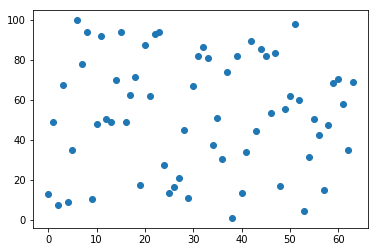

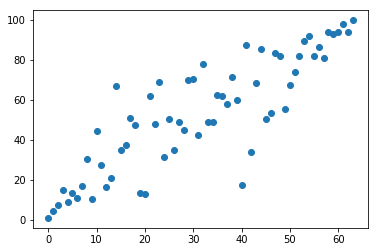

list_size = 128


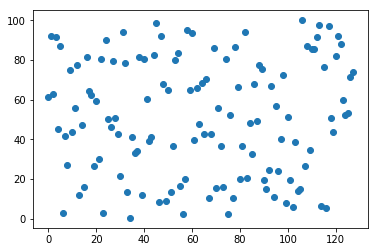

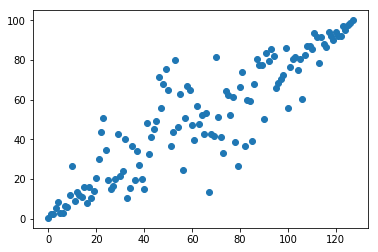

list_size = 192


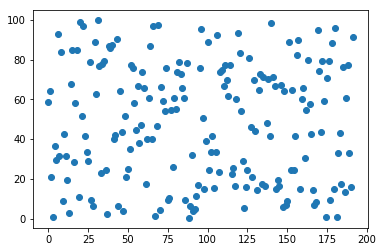

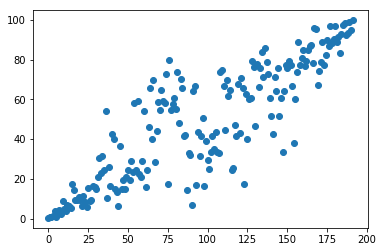

list_size = 256


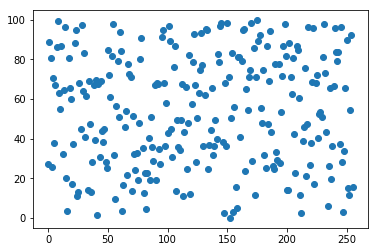

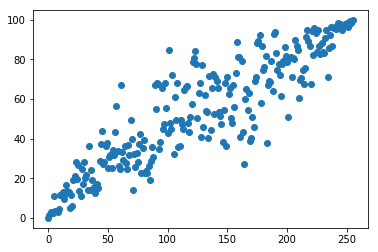

list_size = 320


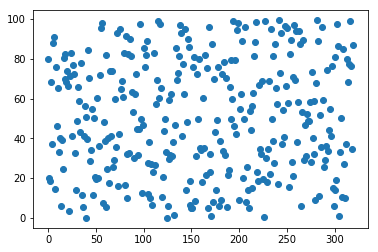

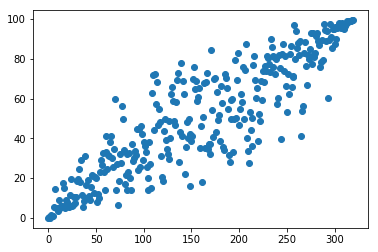

list_size = 384


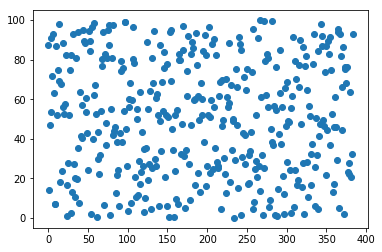

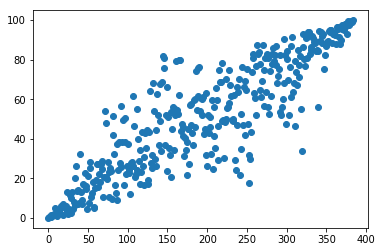

list_size = 448


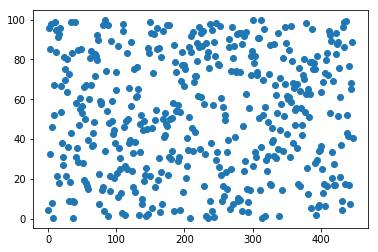

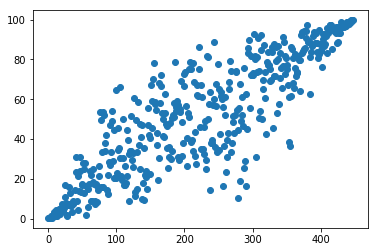

list_size = 512


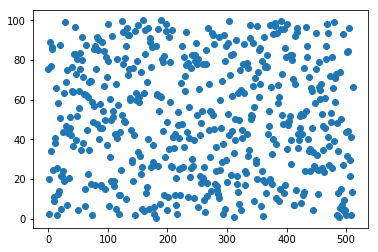

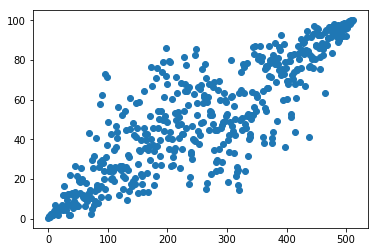

list_size = 576


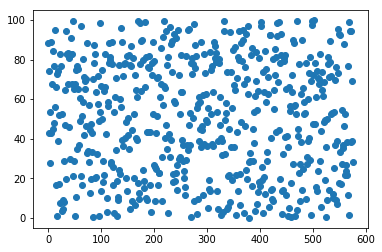

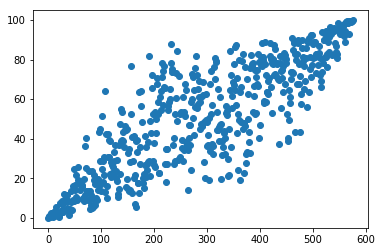

list_size = 640


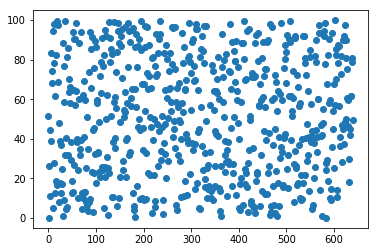

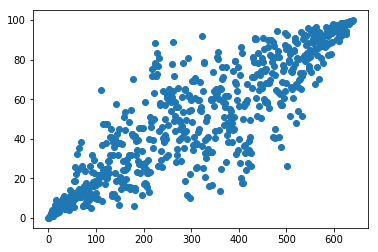

list_size = 704


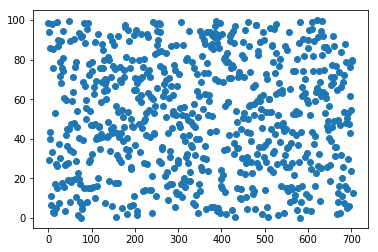

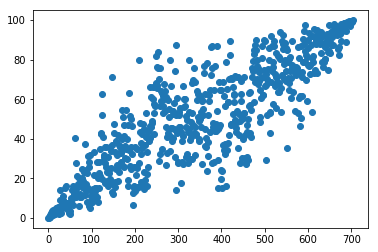

list_size = 768


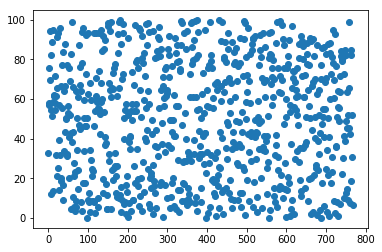

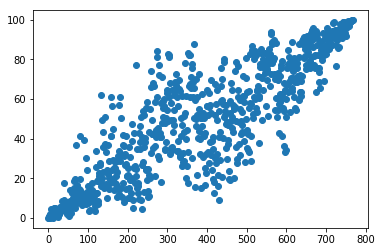

list_size = 832


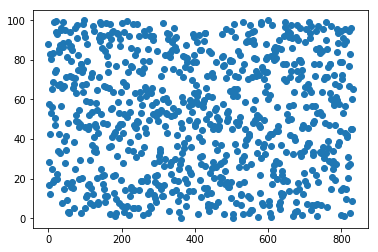

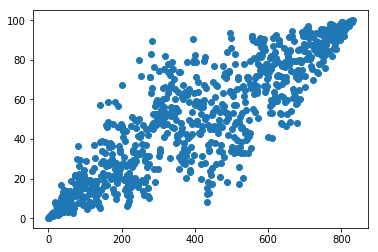

list_size = 896


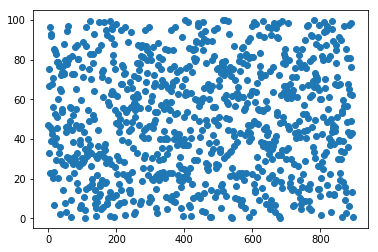

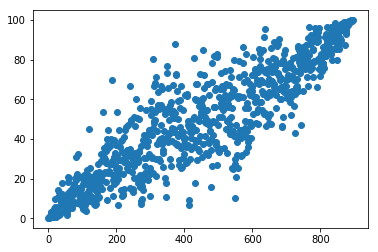

list_size = 960


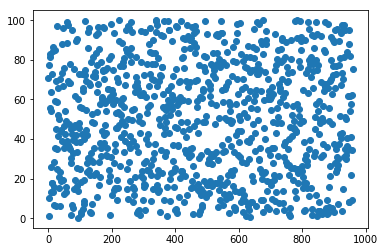

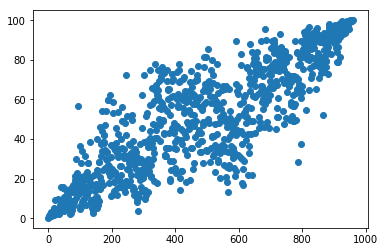

list_size = 1024


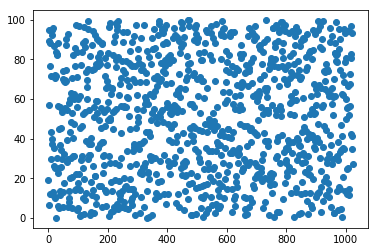

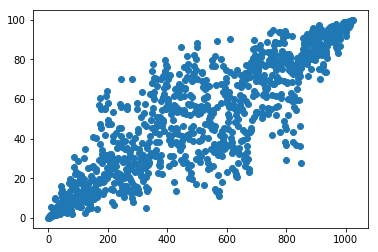

In [3]:
import matplotlib.pyplot as plt
def BiHeapifyPlot():
    list_size_start = 2**6
    list_size_end = 2**10
    list_size_increment = 2**6
    list_size = list_size_start
    num_random_lists_per_vec_size = 2**0
    while list_size <= list_size_end:
        ints_list = [x for x in range(list_size)]
        for _ in range(num_random_lists_per_vec_size):
            print('list_size =', list_size)
            li = [100 * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li)
            plt.show()
            BiHeapify(li, list_size)
            plt.scatter(ints_list, li)
            plt.show()
        list_size += list_size_increment
    return 

BiHeapifyPlot()


list_size = 64


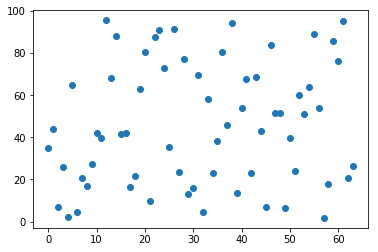

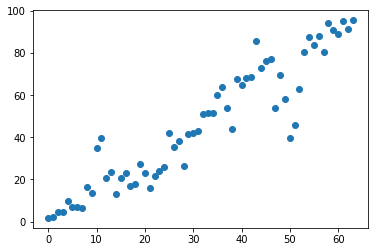

list_size = 128


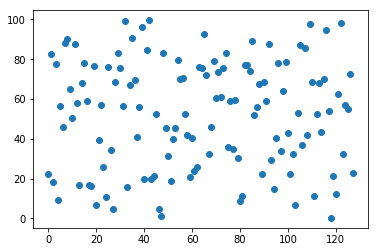

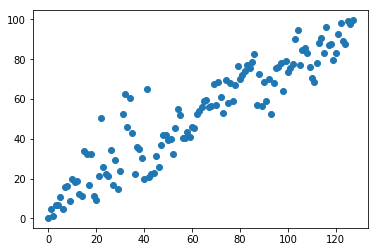

list_size = 192


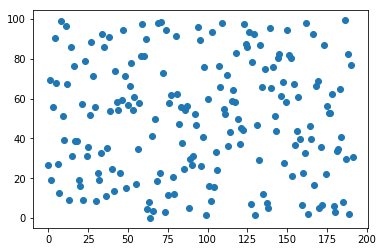

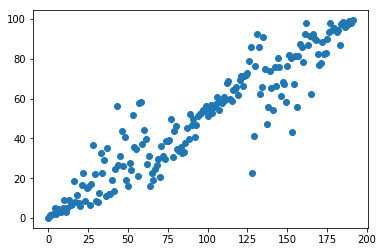

list_size = 256


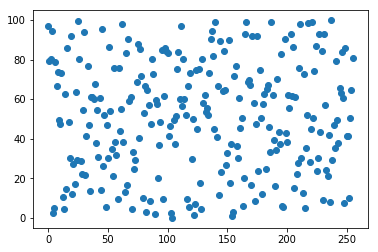

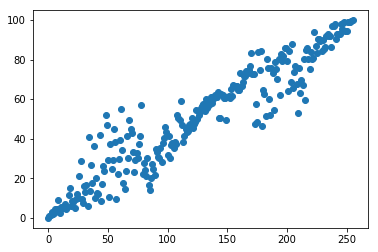

list_size = 320


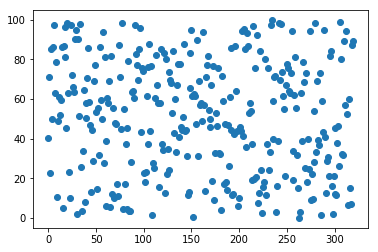

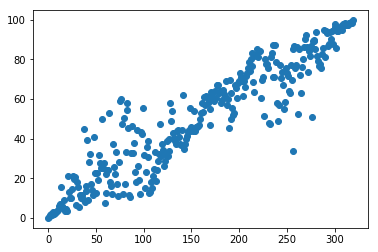

list_size = 384


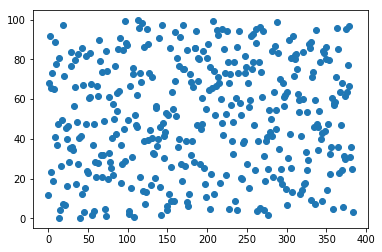

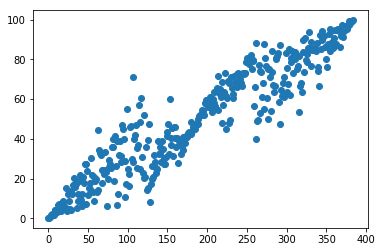

list_size = 448


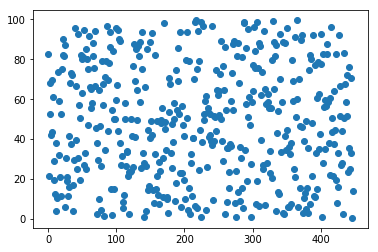

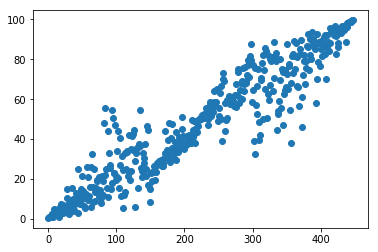

list_size = 512


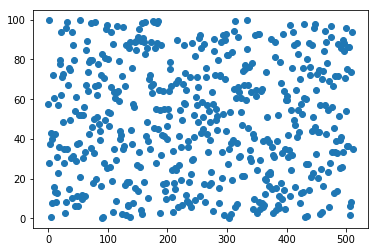

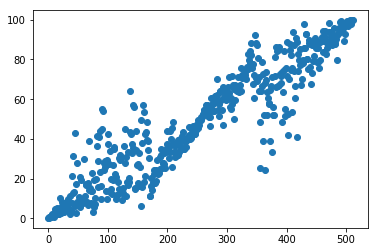

list_size = 576


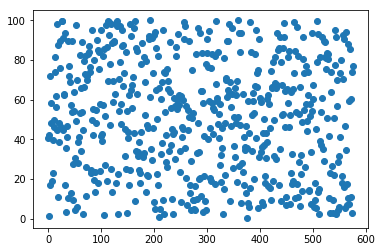

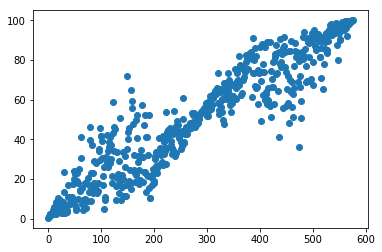

list_size = 640


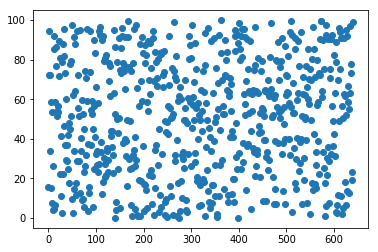

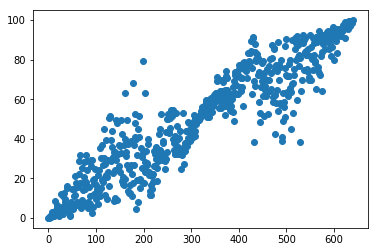

list_size = 704


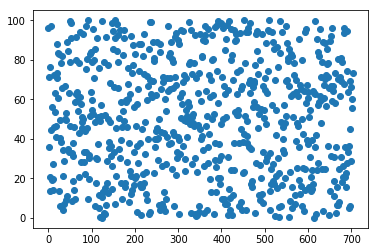

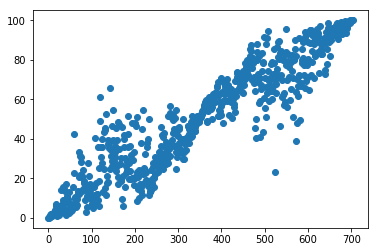

list_size = 768


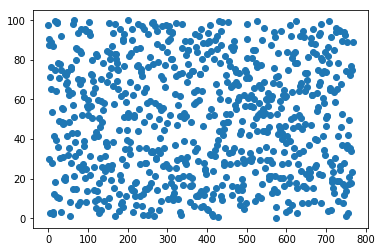

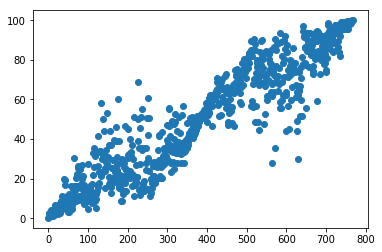

list_size = 832


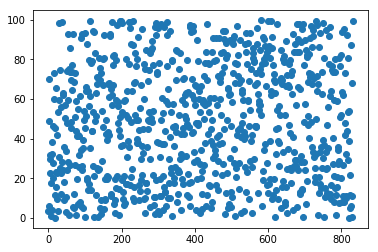

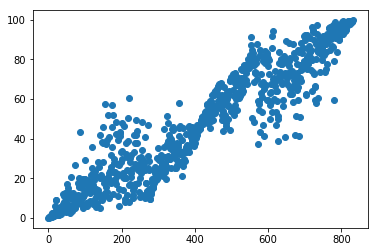

list_size = 896


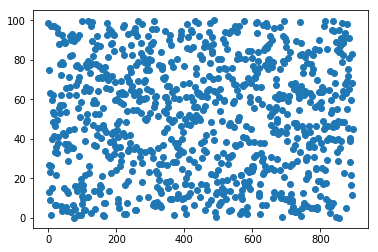

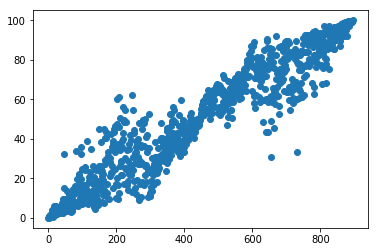

list_size = 960


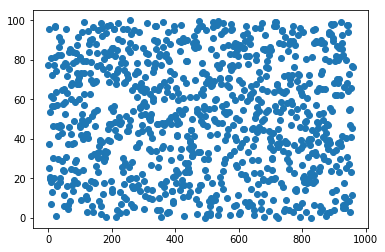

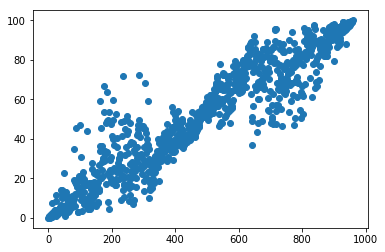

list_size = 1024


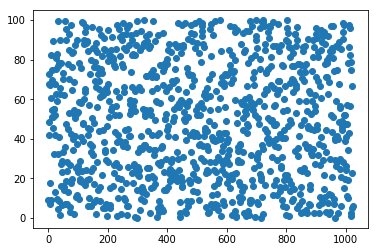

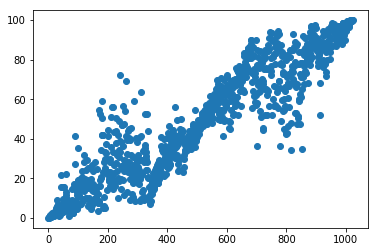

list_size = 1088


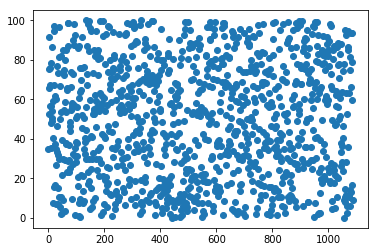

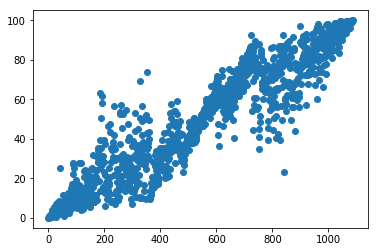

list_size = 1152


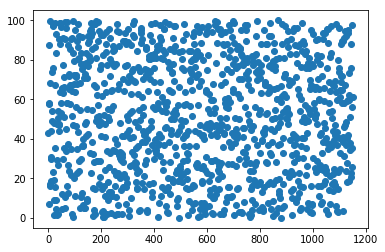

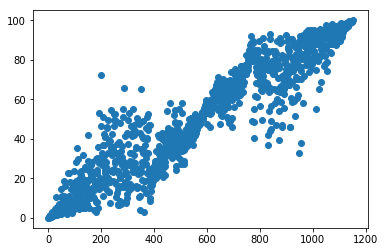

list_size = 1216


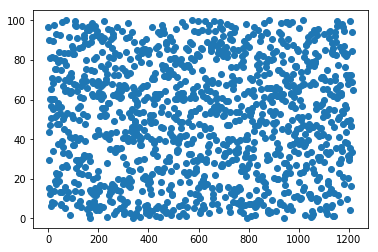

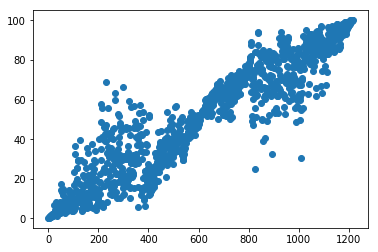

list_size = 1280


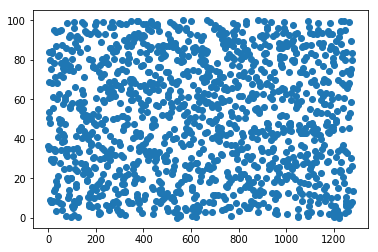

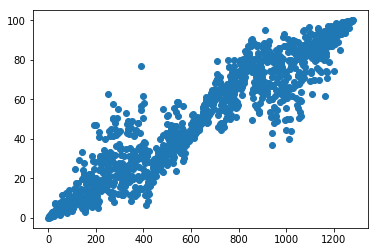

list_size = 1344


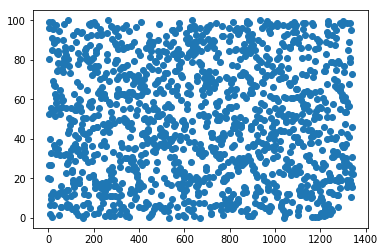

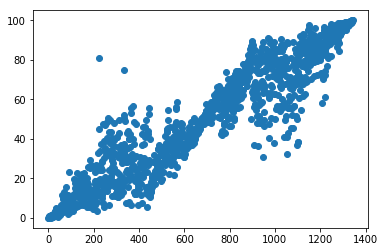

list_size = 1408


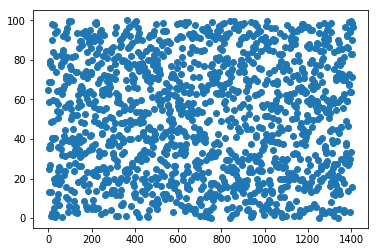

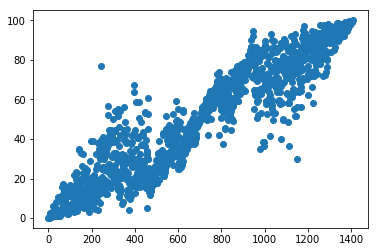

list_size = 1472


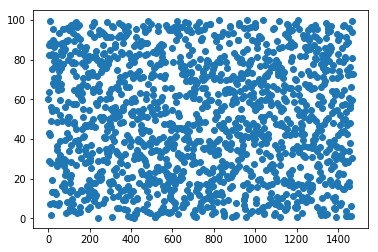

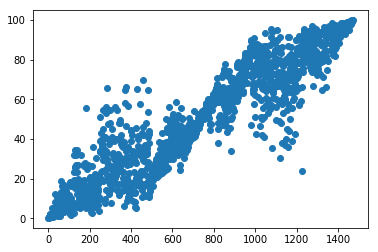

list_size = 1536


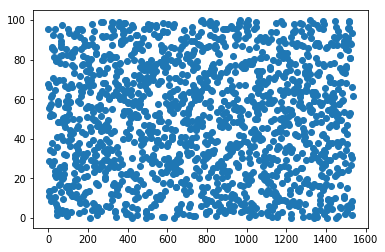

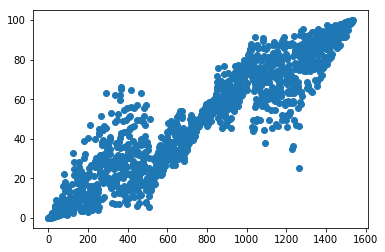

list_size = 1600


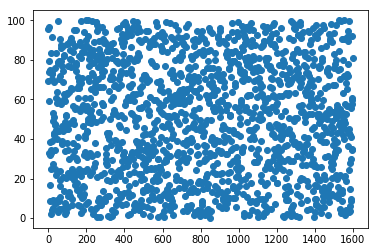

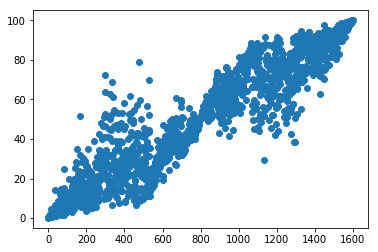

list_size = 1664


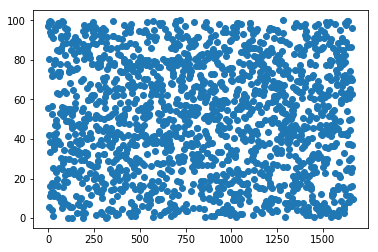

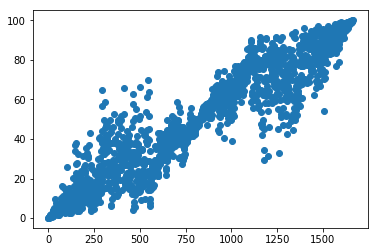

list_size = 1728


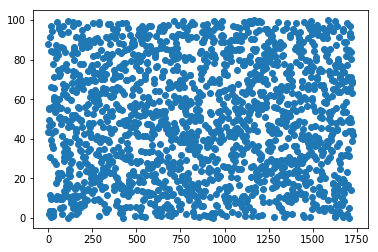

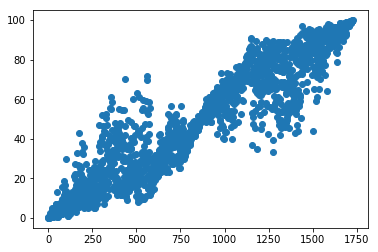

list_size = 1792


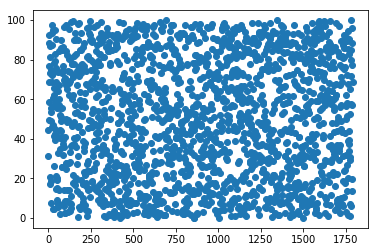

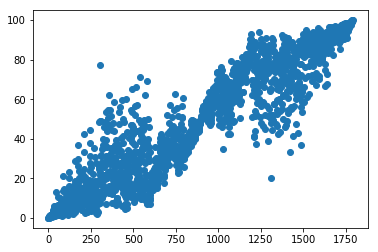

list_size = 1856


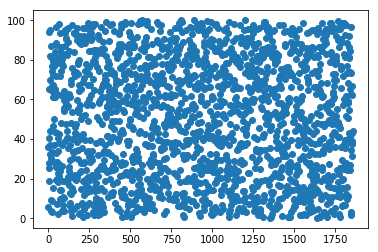

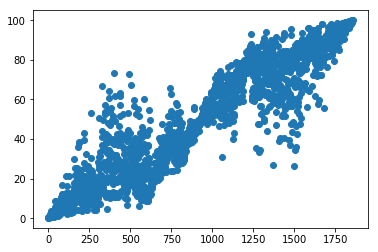

list_size = 1920


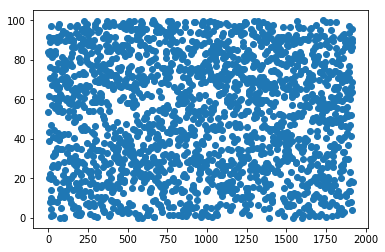

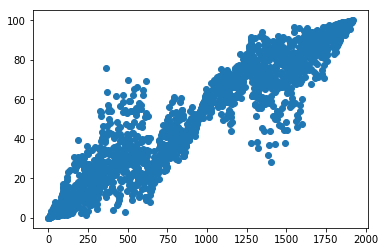

list_size = 1984


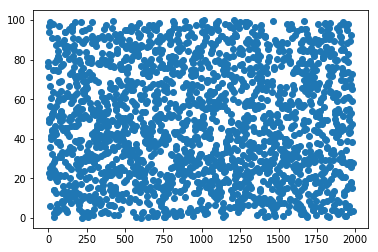

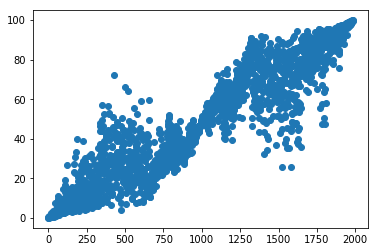

list_size = 2048


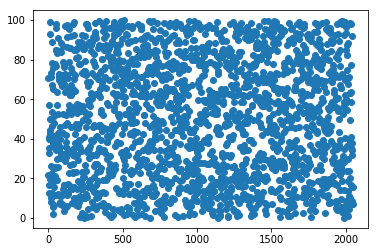

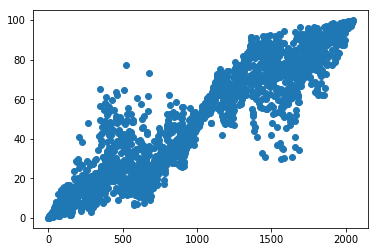

list_size = 2112


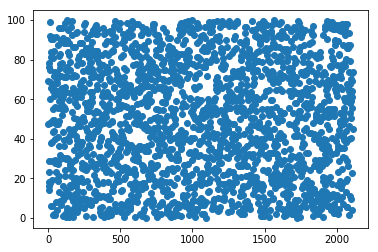

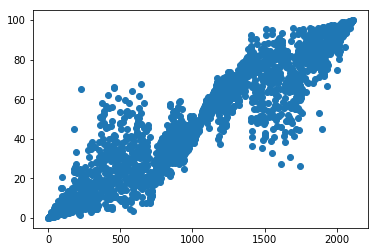

list_size = 2176


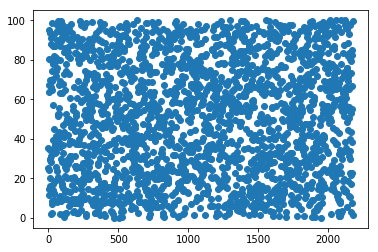

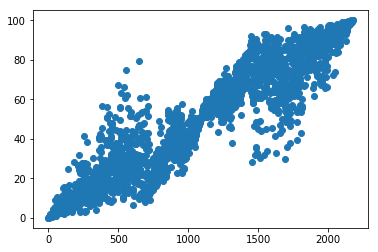

list_size = 2240


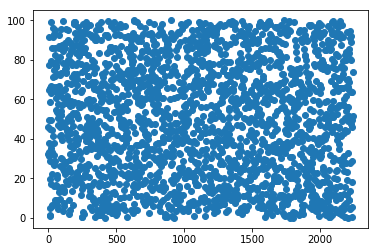

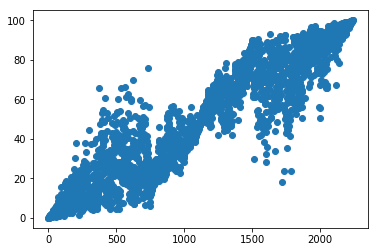

list_size = 2304


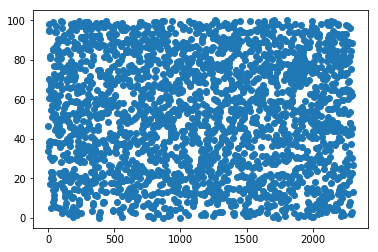

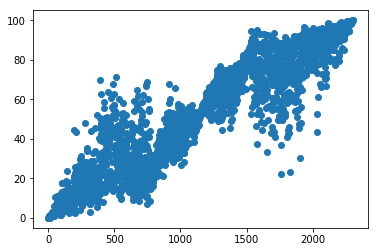

list_size = 2368


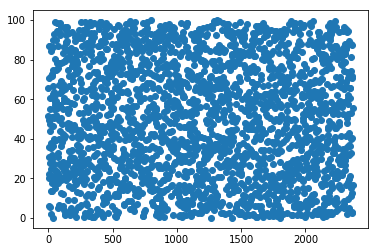

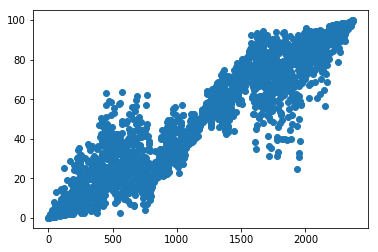

list_size = 2432


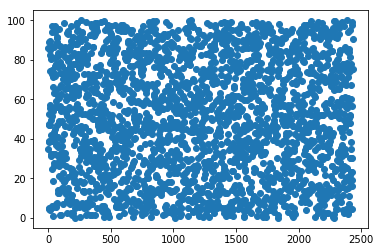

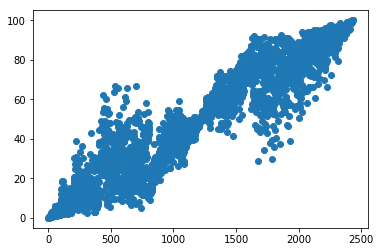

list_size = 2496


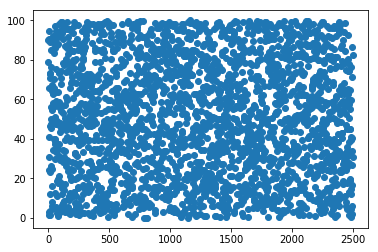

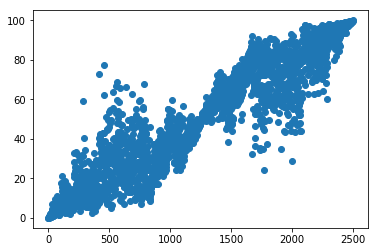

list_size = 2560


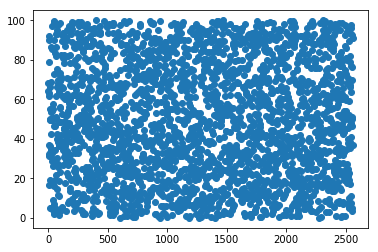

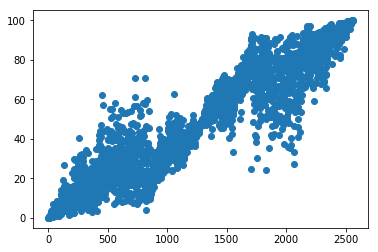

list_size = 2624


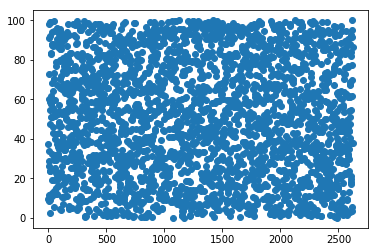

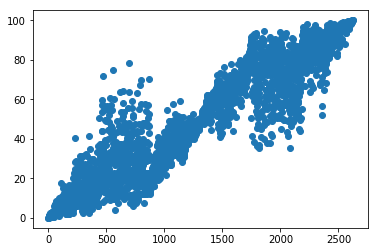

list_size = 2688


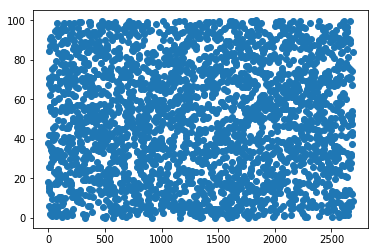

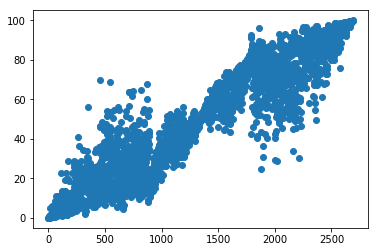

list_size = 2752


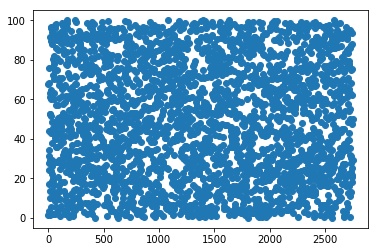

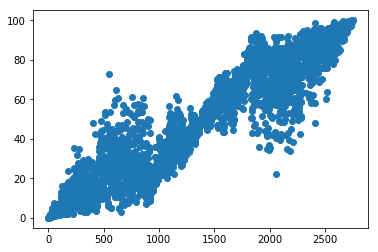

list_size = 2816


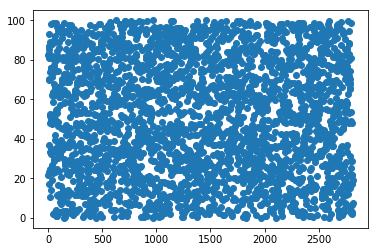

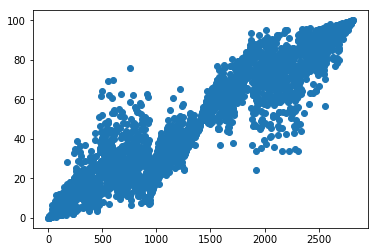

list_size = 2880


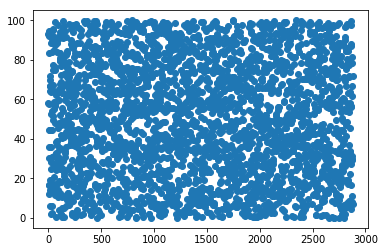

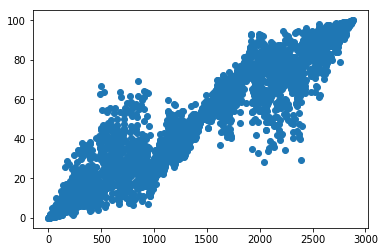

list_size = 2944


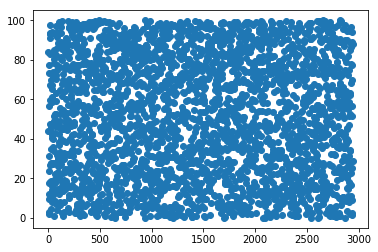

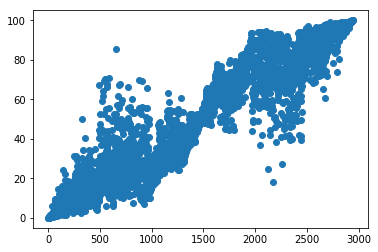

list_size = 3008


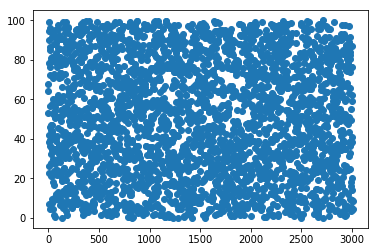

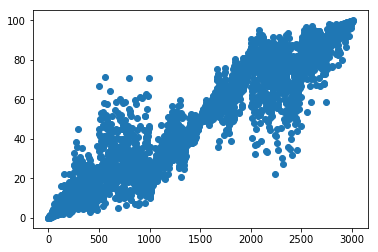

list_size = 3072


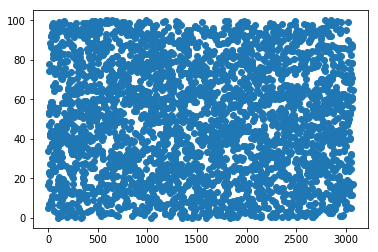

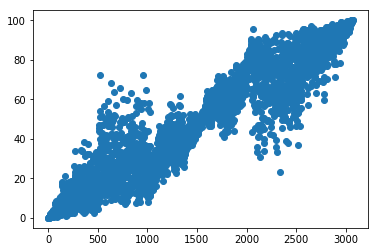

list_size = 3136


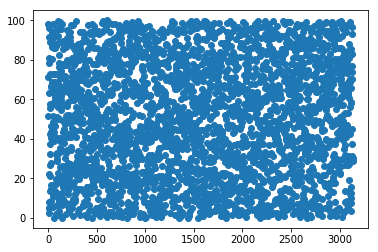

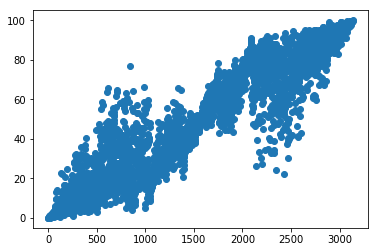

list_size = 3200


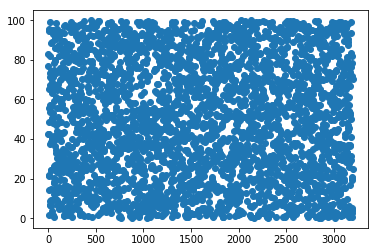

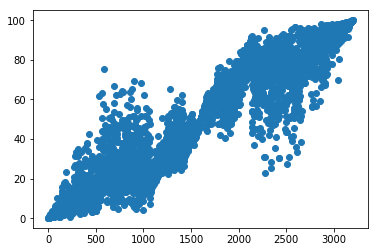

list_size = 3264


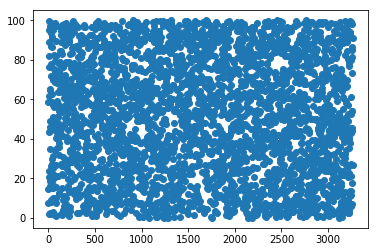

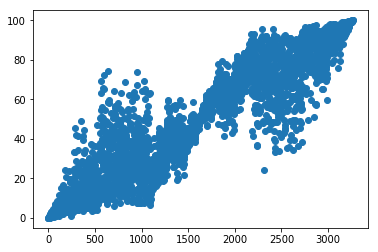

list_size = 3328


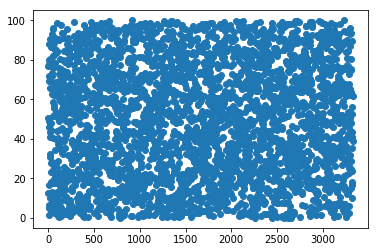

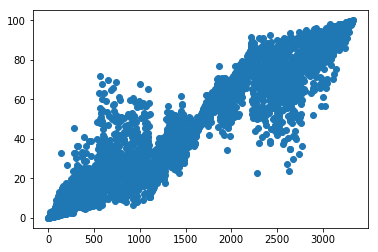

list_size = 3392


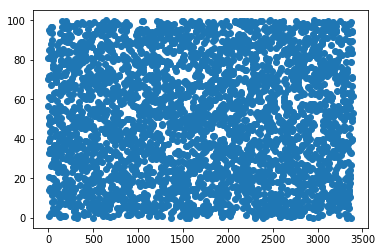

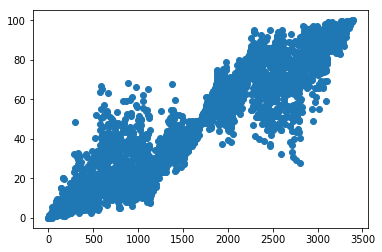

list_size = 3456


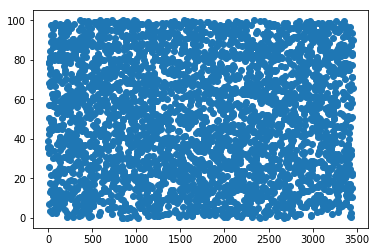

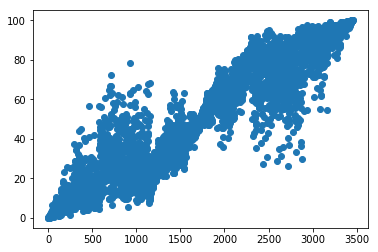

list_size = 3520


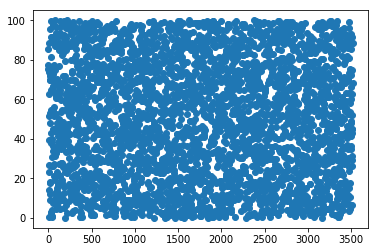

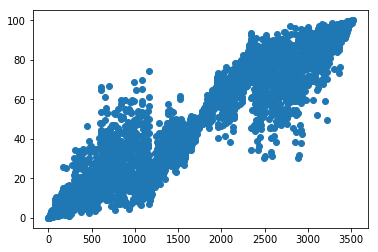

list_size = 3584


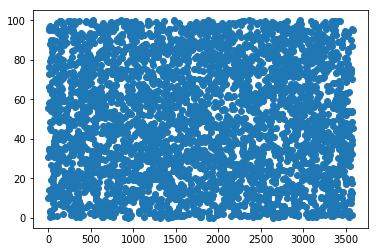

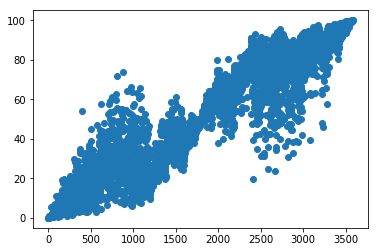

list_size = 3648


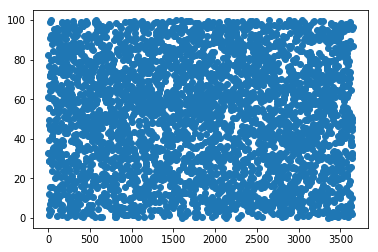

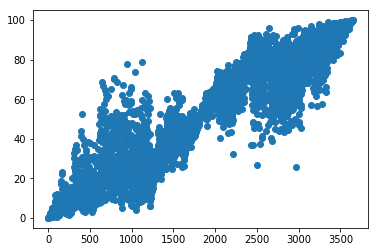

list_size = 3712


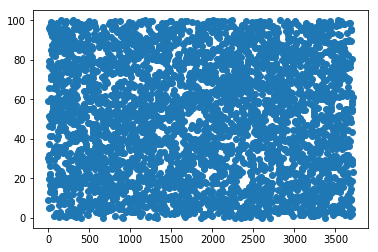

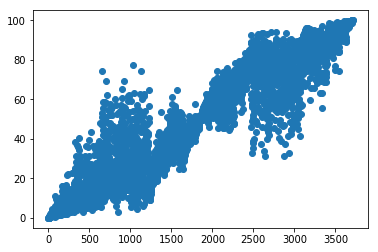

list_size = 3776


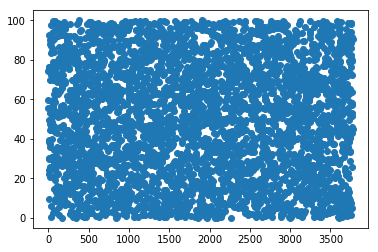

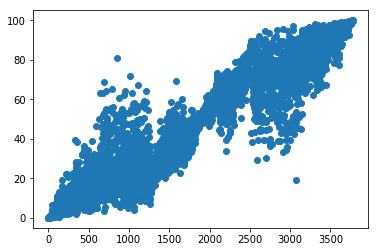

list_size = 3840


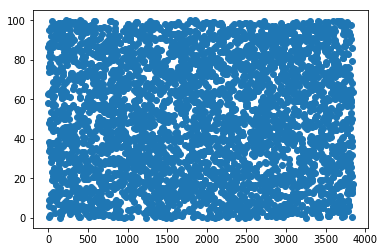

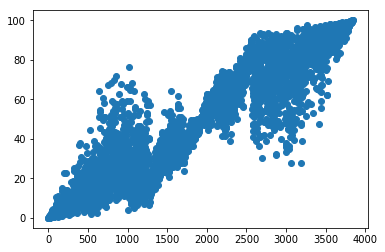

list_size = 3904


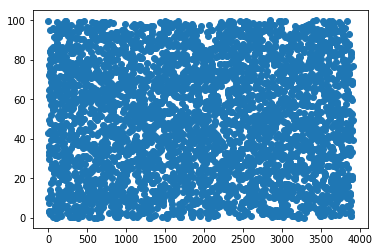

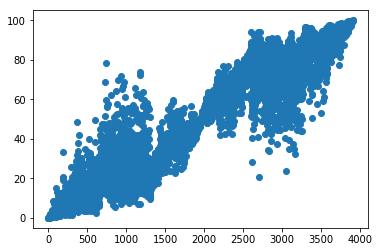

list_size = 3968


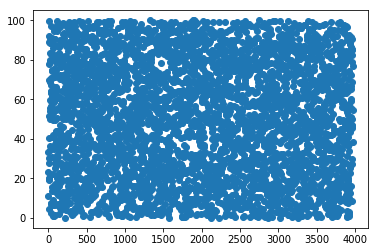

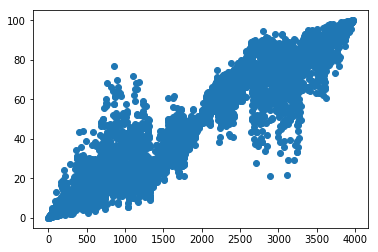

list_size = 4032


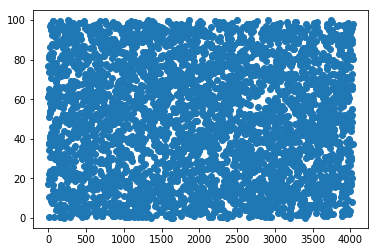

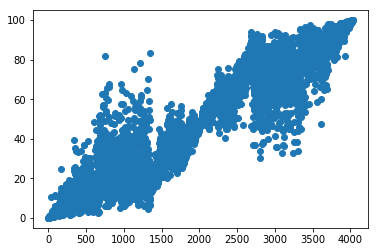

list_size = 4096


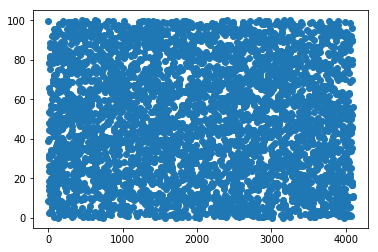

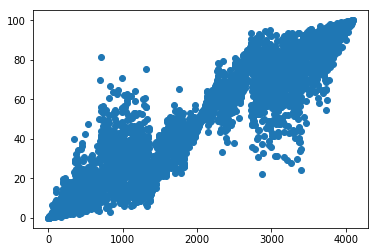

list_size = 4160


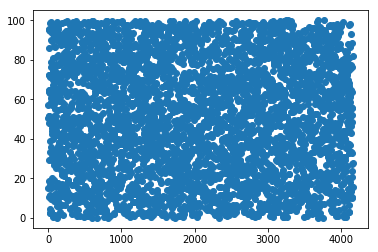

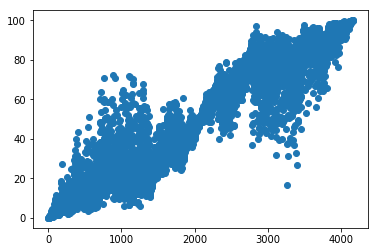

list_size = 4224


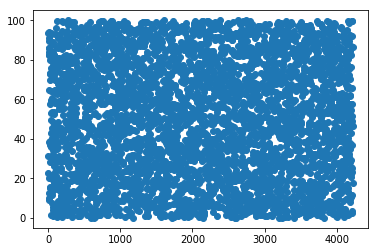

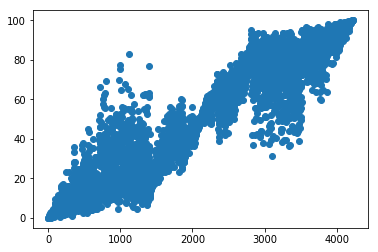

list_size = 4288


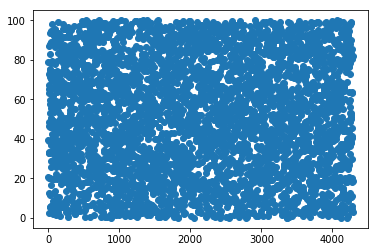

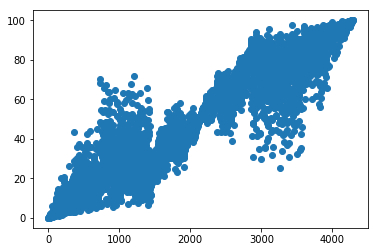

list_size = 4352


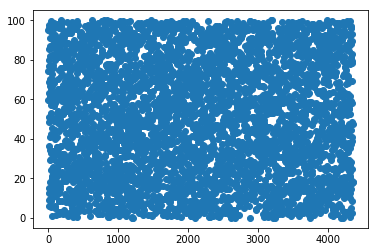

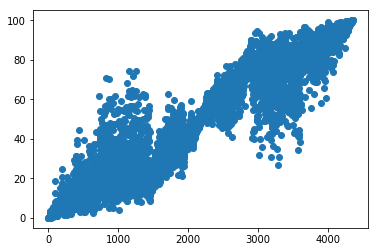

list_size = 4416


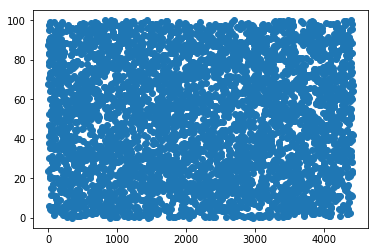

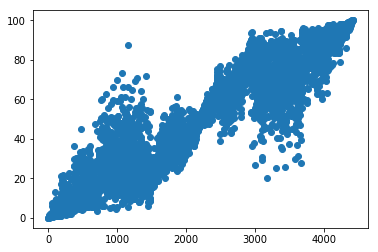

list_size = 4480


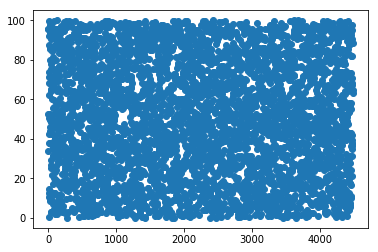

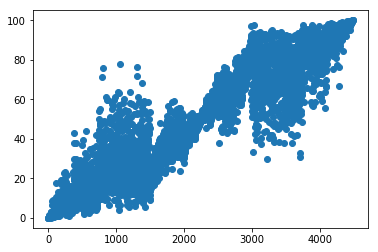

list_size = 4544


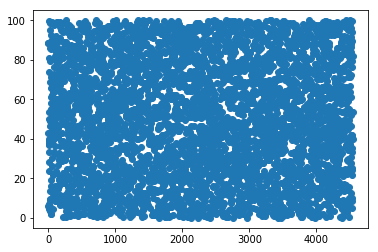

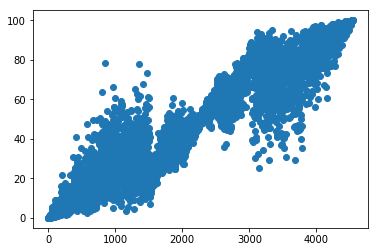

list_size = 4608


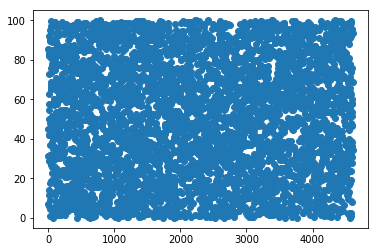

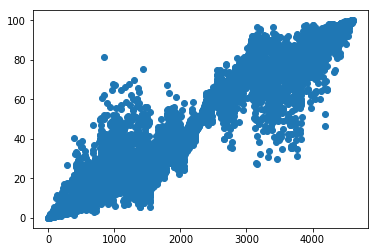

list_size = 4672


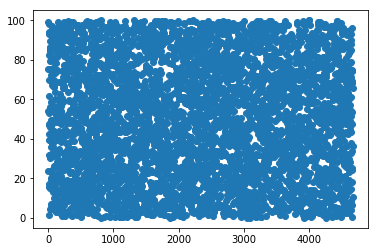

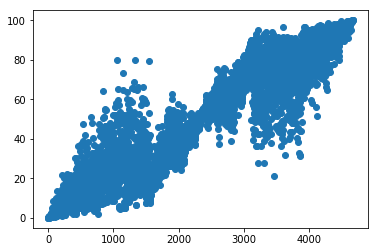

list_size = 4736


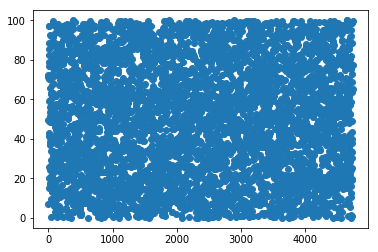

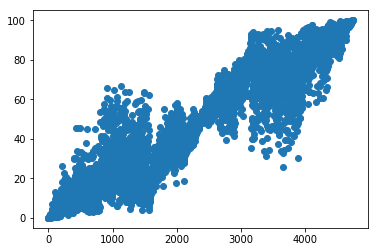

list_size = 4800


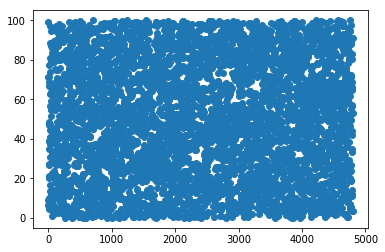

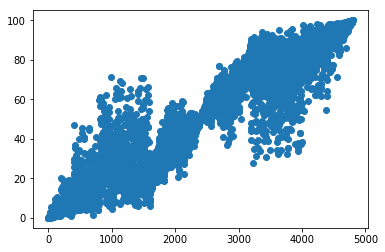

list_size = 4864


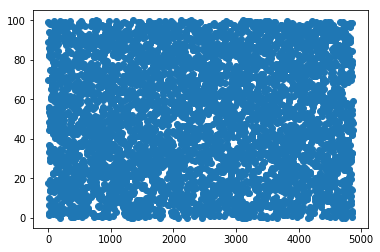

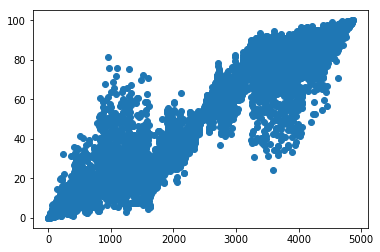

list_size = 4928


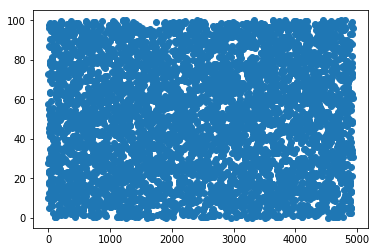

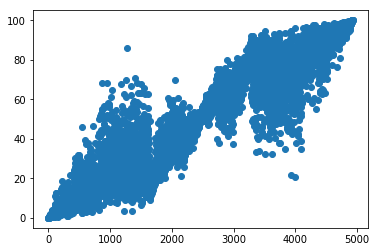

list_size = 4992


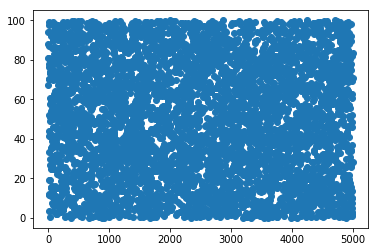

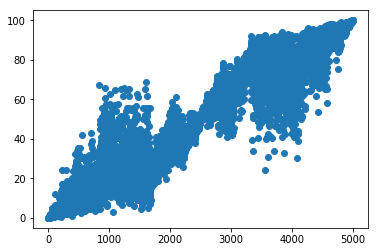

list_size = 5056


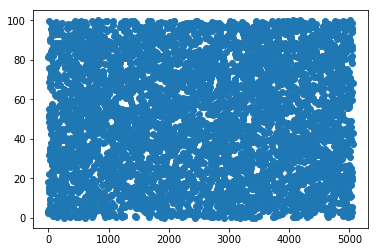

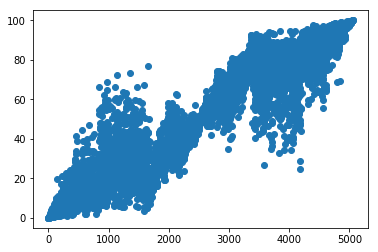

list_size = 5120


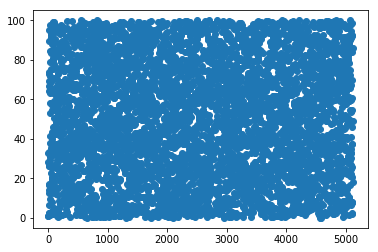

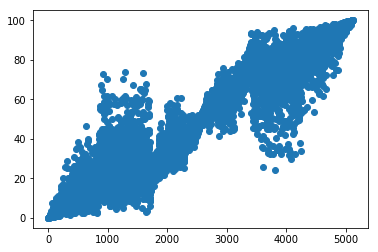

list_size = 5184


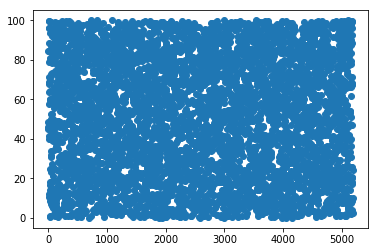

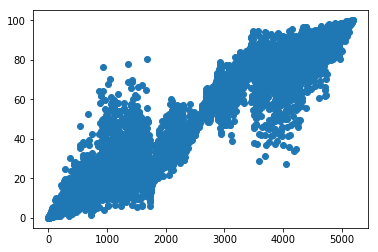

list_size = 5248


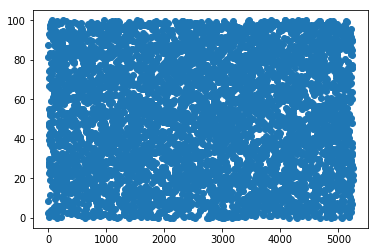

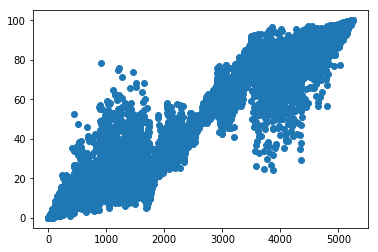

list_size = 5312


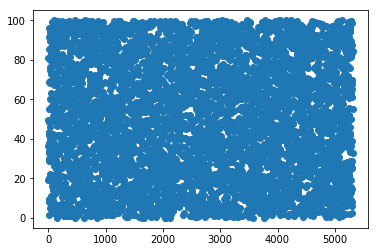

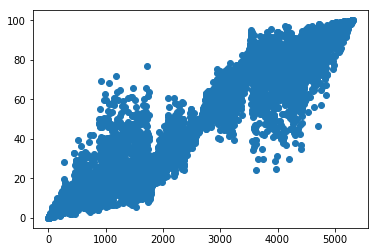

list_size = 5376


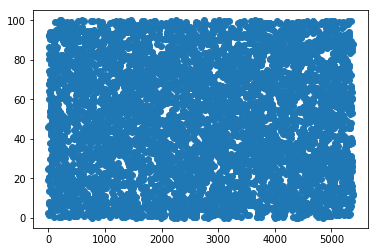

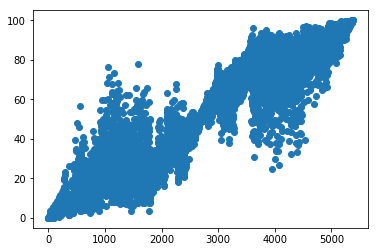

list_size = 5440


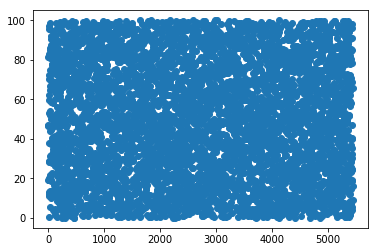

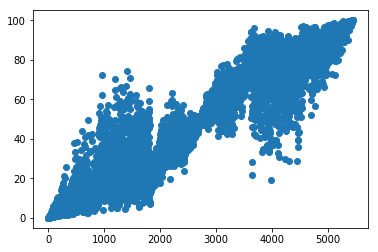

list_size = 5504


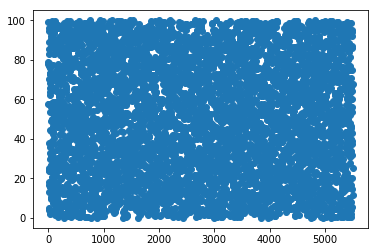

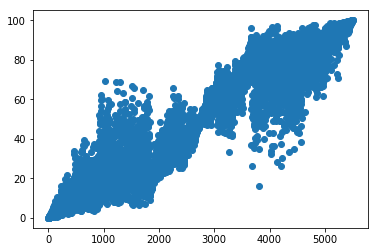

list_size = 5568


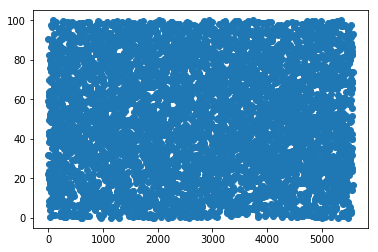

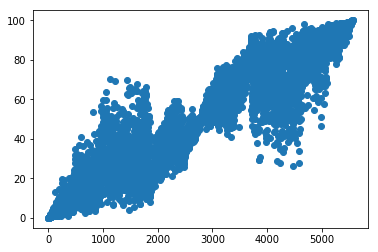

list_size = 5632


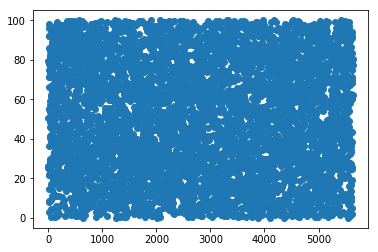

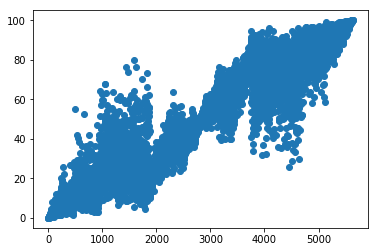

list_size = 5696


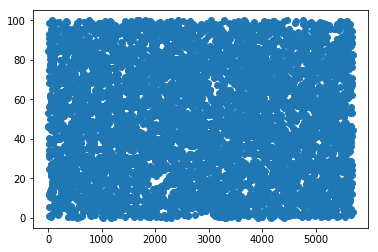

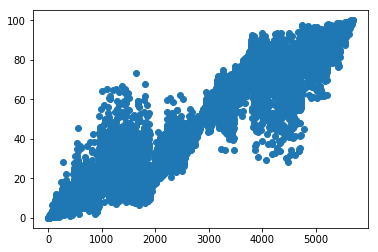

list_size = 5760


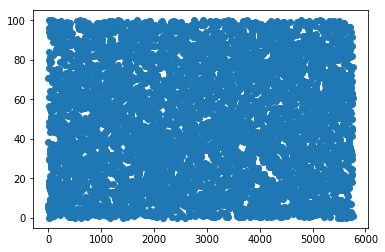

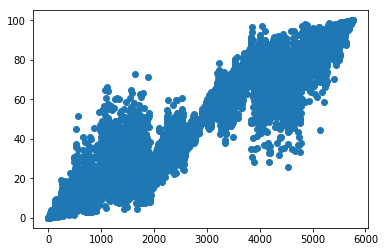

list_size = 5824


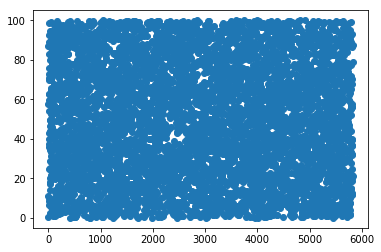

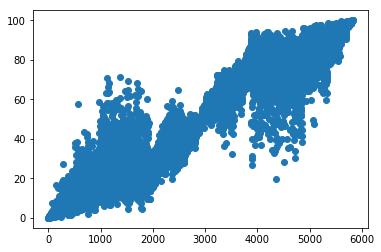

list_size = 5888


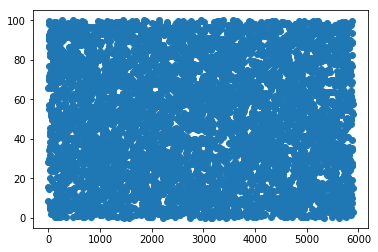

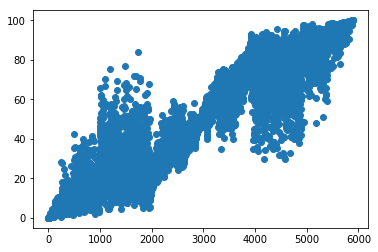

list_size = 5952


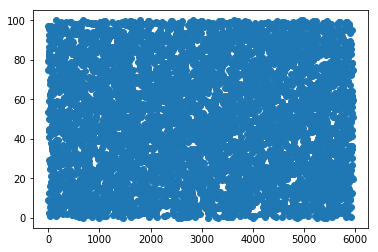

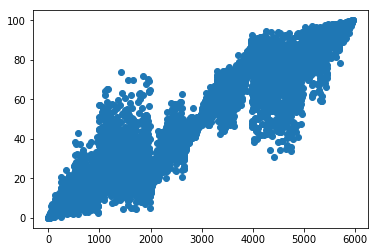

list_size = 6016


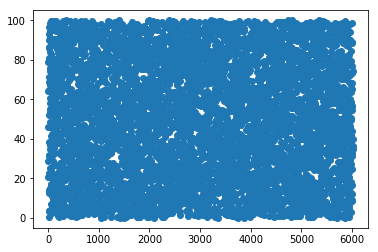

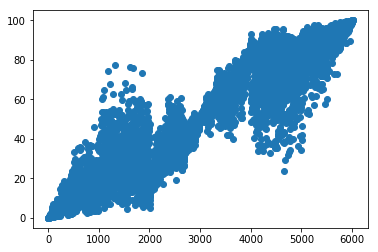

list_size = 6080


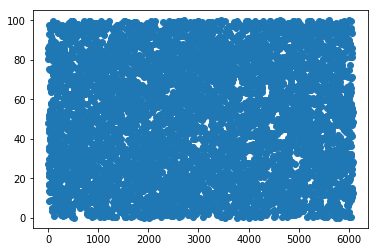

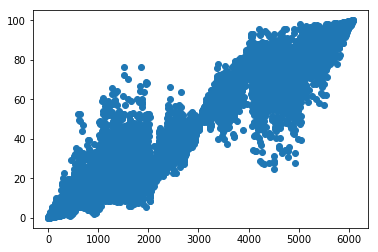

list_size = 6144


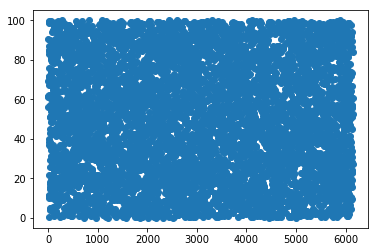

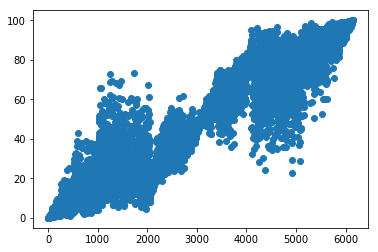

list_size = 6208


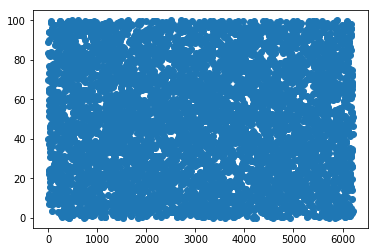

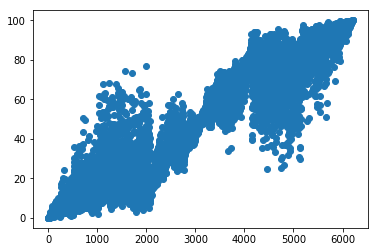

list_size = 6272


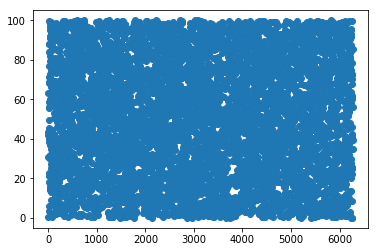

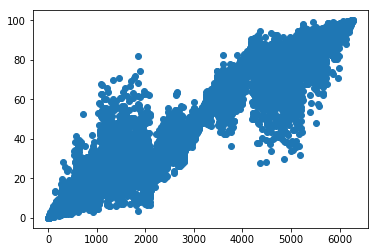

list_size = 6336


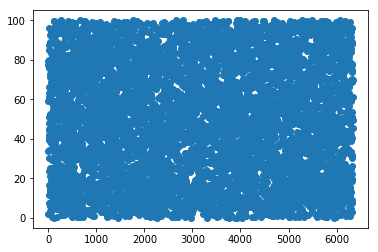

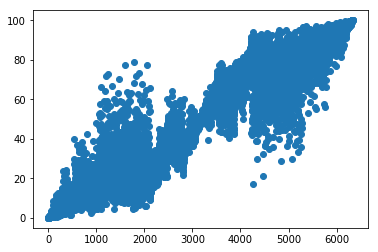

list_size = 6400


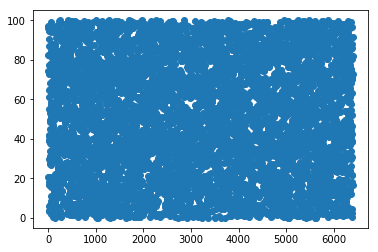

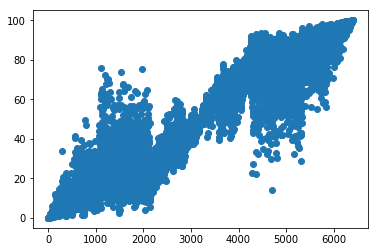

list_size = 6464


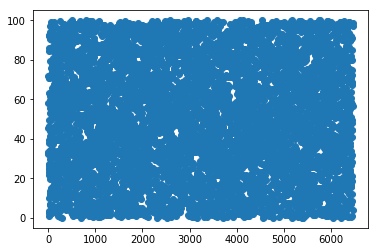

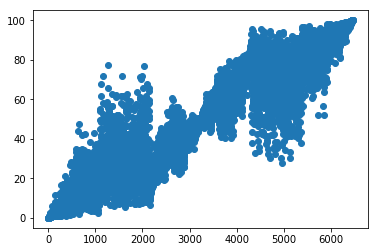

list_size = 6528


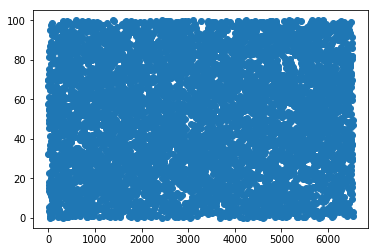

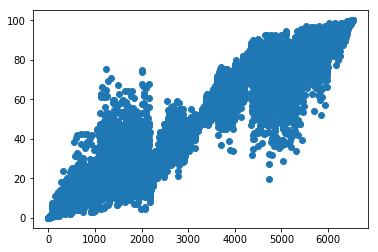

list_size = 6592


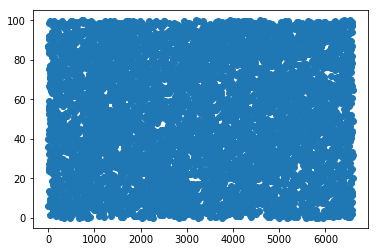

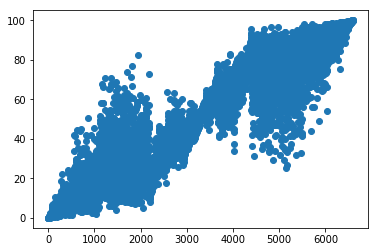

list_size = 6656


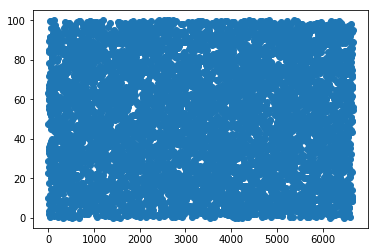

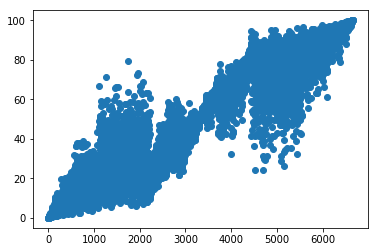

list_size = 6720


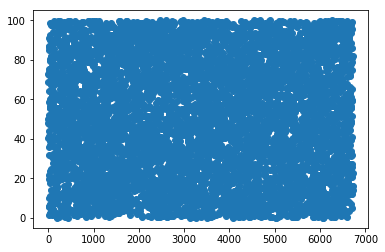

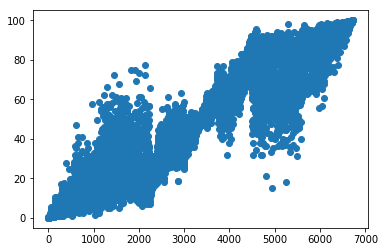

list_size = 6784


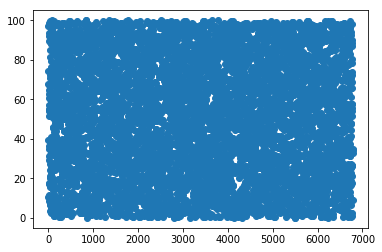

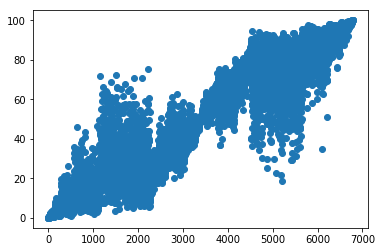

list_size = 6848


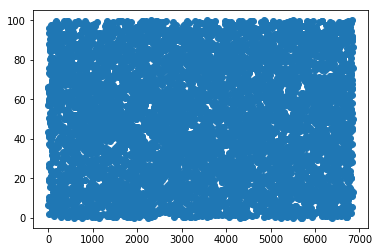

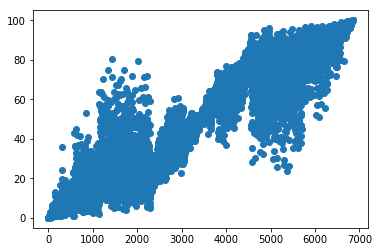

list_size = 6912


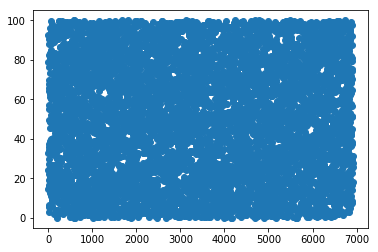

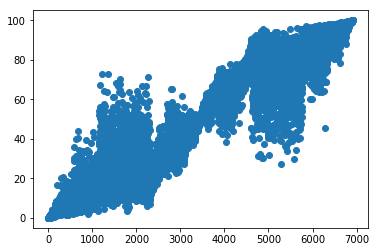

list_size = 6976


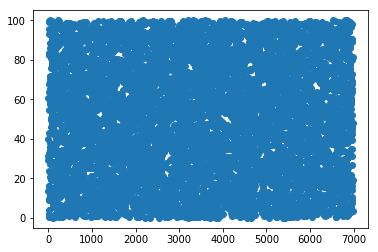

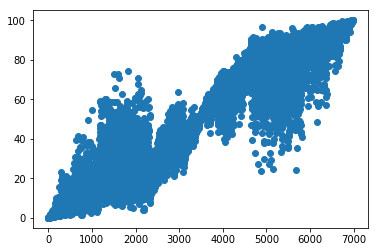

list_size = 7040


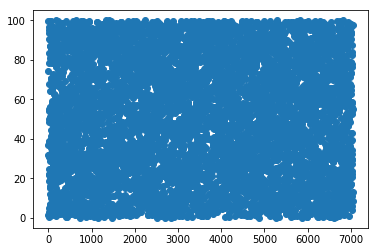

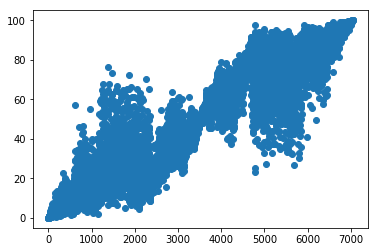

list_size = 7104


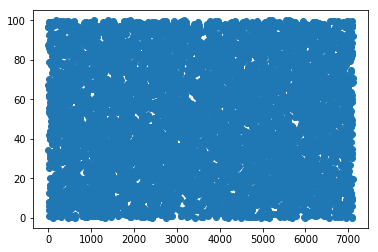

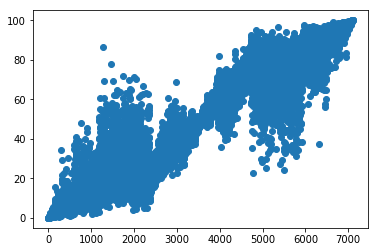

list_size = 7168


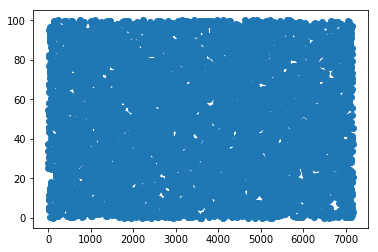

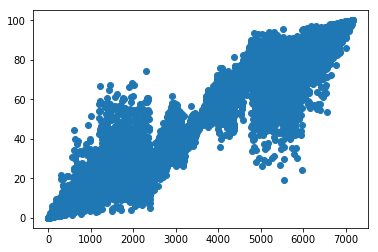

list_size = 7232


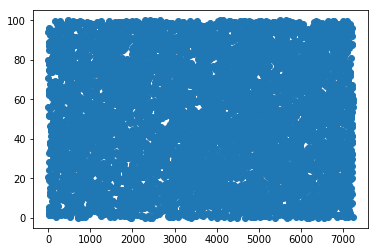

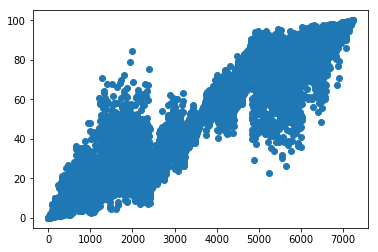

list_size = 7296


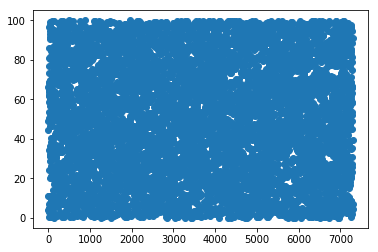

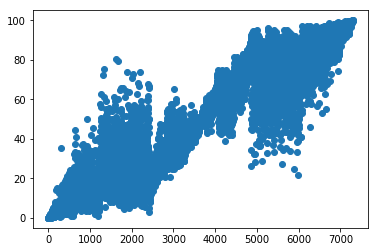

list_size = 7360


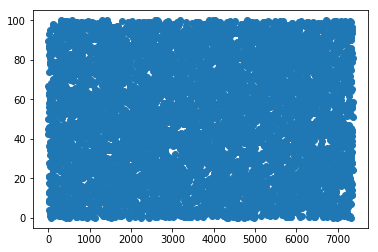

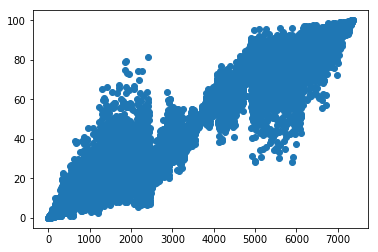

list_size = 7424


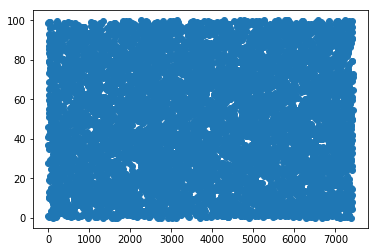

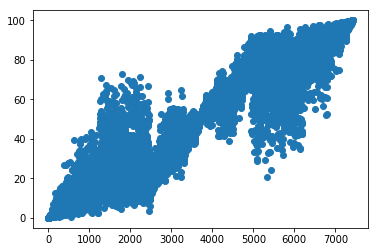

list_size = 7488


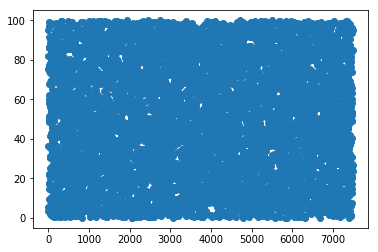

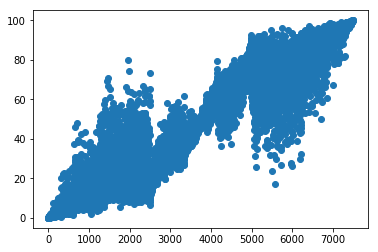

list_size = 7552


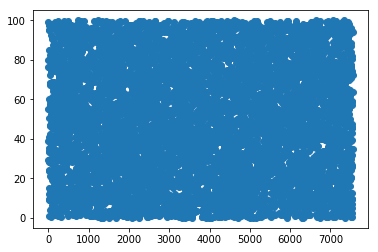

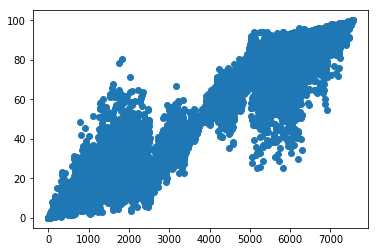

list_size = 7616


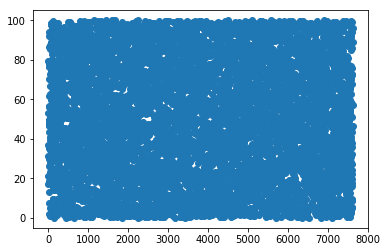

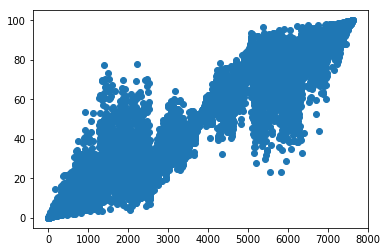

list_size = 7680


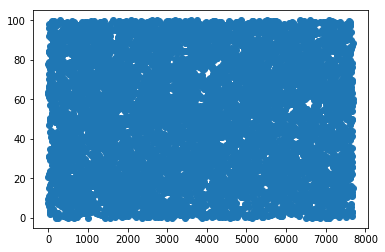

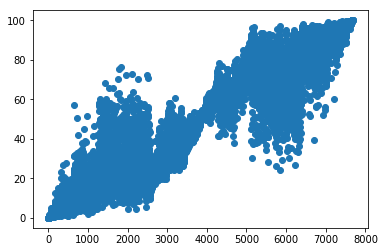

list_size = 7744


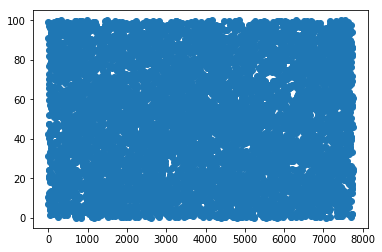

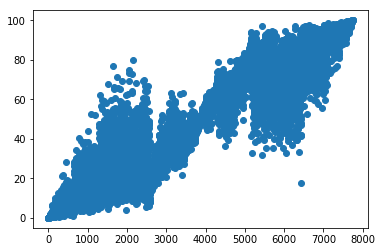

list_size = 7808


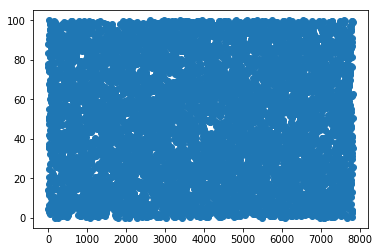

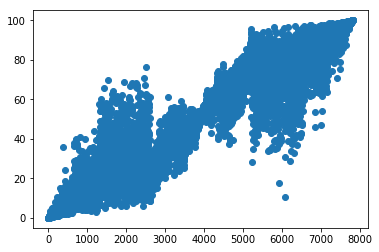

list_size = 7872


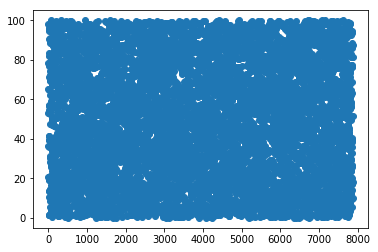

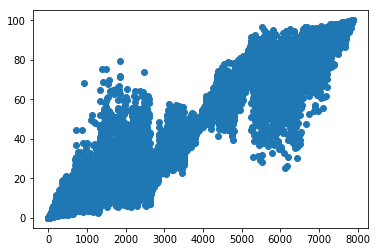

list_size = 7936


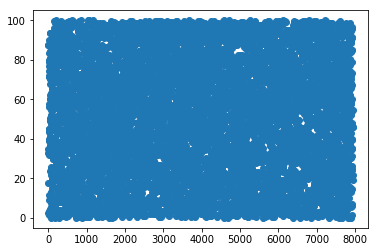

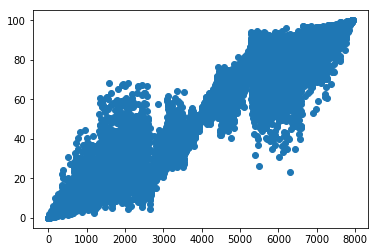

list_size = 8000


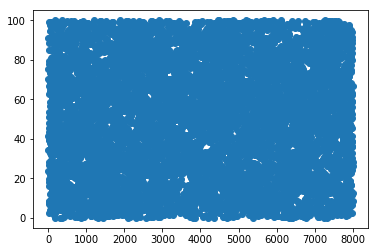

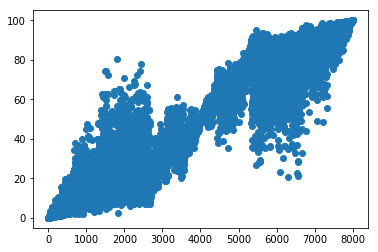

list_size = 8064


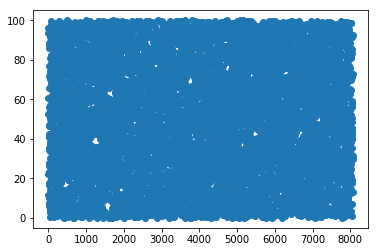

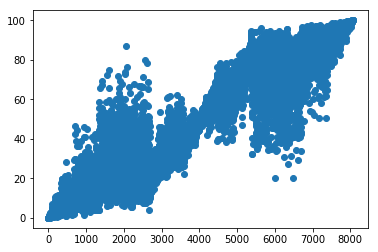

list_size = 8128


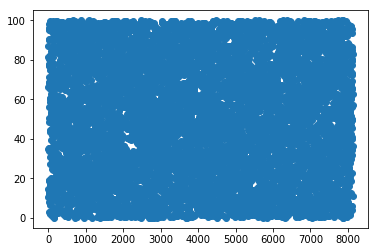

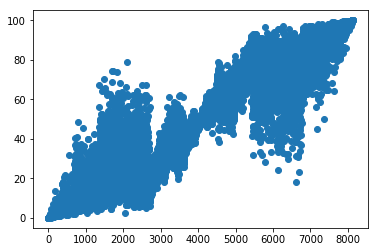

list_size = 8192


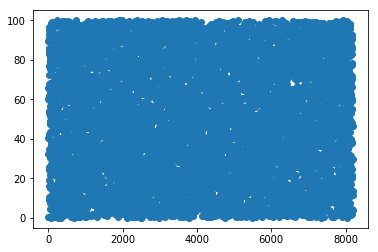

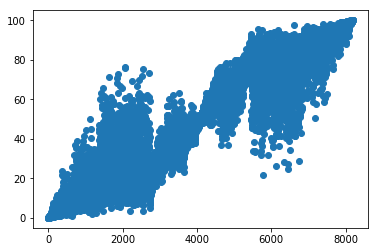

In [4]:
def BiHeapifyInwardsPlot():
    list_size_start = 2**6
    list_size_end = 2**13
    list_size_increment = 2**6
    list_size = list_size_start
    ratio = 0.25
    num_random_lists_per_vec_size = 2**0
    while list_size <= list_size_end:
        ints_list = [x for x in range(list_size)]
        for _ in range(num_random_lists_per_vec_size):
            print('list_size =', list_size)
            li = [100 * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li)
            plt.show()
            BiHeapifyInwards(li, list_size)
            #BiHeapifyInwardsRecursiveWithVerification(li, 0, list_size, ratio)
            plt.scatter(ints_list, li)
            plt.show()
        list_size += list_size_increment
    return 

BiHeapifyInwardsPlot()

list_size = 64


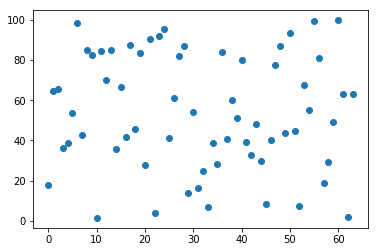

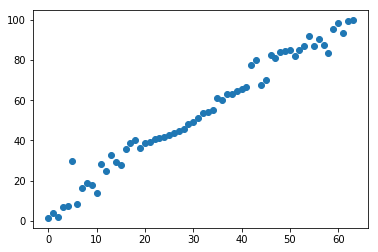

list_size = 321


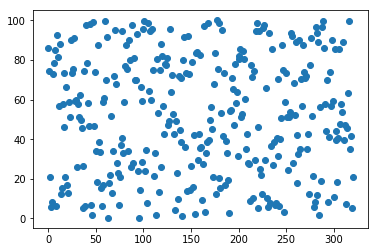

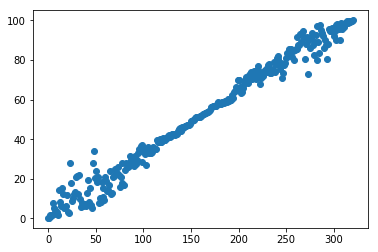

list_size = 578


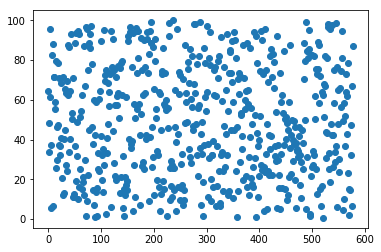

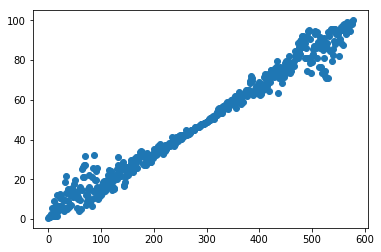

list_size = 835


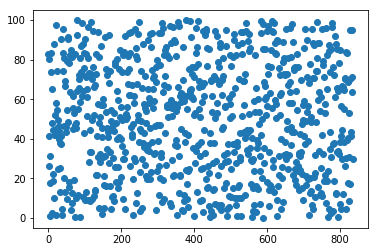

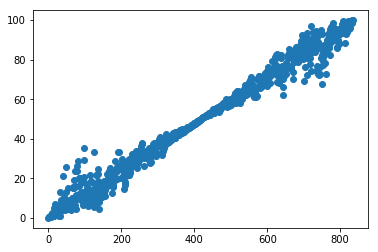

list_size = 1092


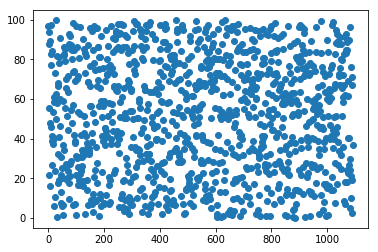

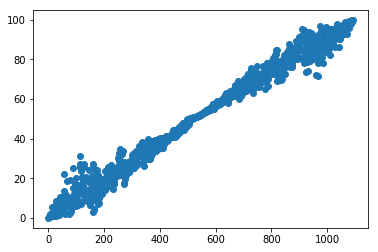

list_size = 1349


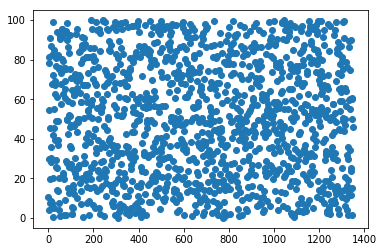

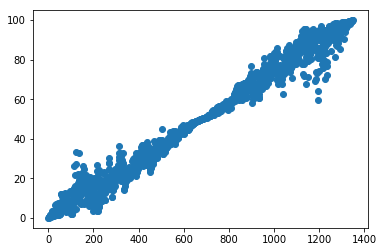

list_size = 1606


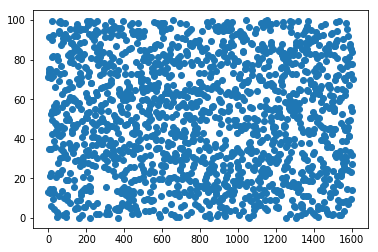

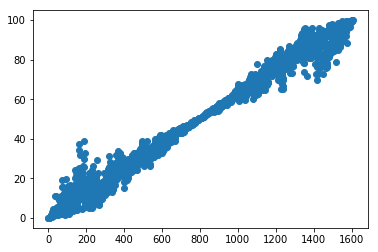

list_size = 1863


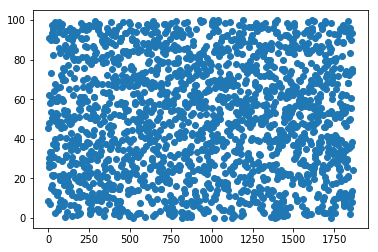

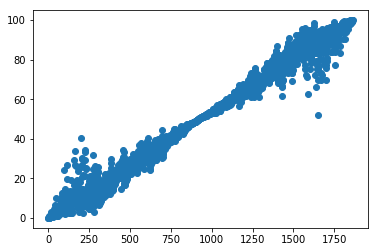

list_size = 2120


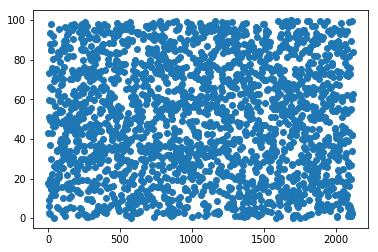

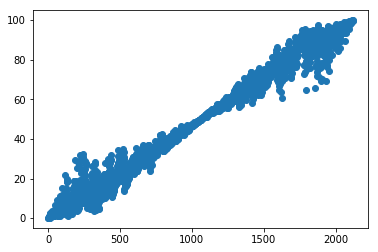

list_size = 2377


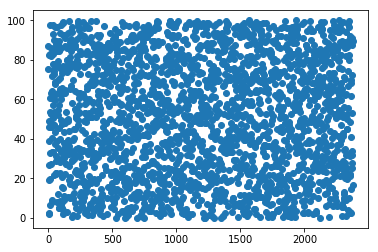

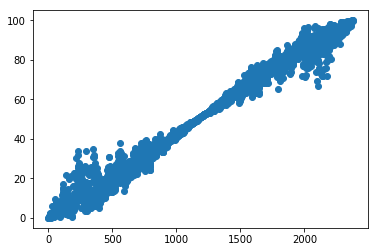

list_size = 2634


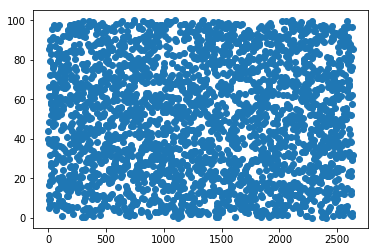

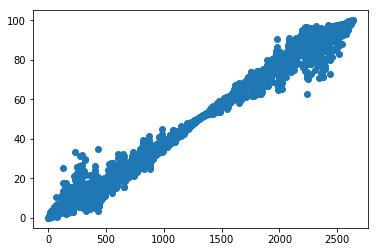

list_size = 2891


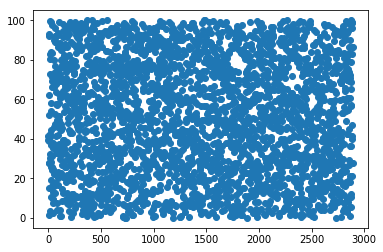

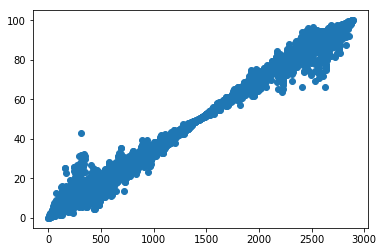

list_size = 3148


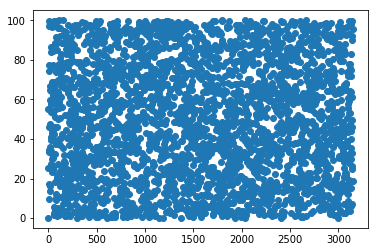

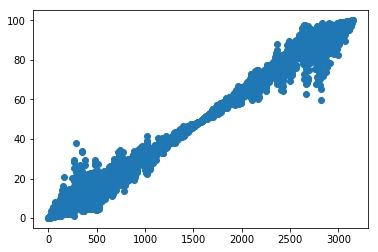

list_size = 3405


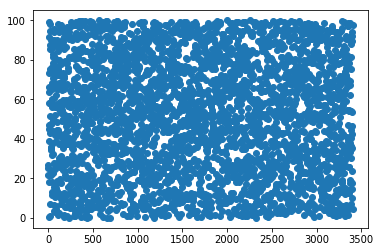

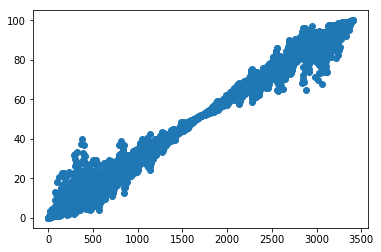

list_size = 3662


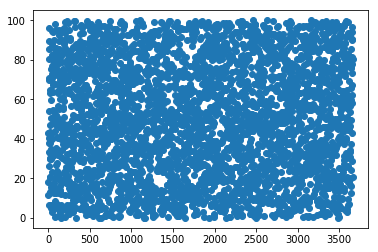

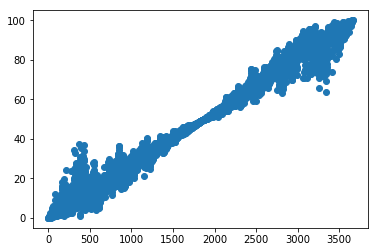

list_size = 3919


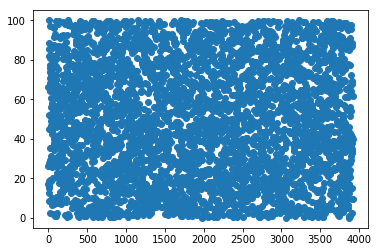

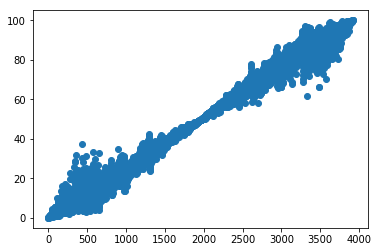

list_size = 4176


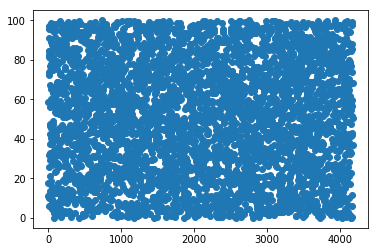

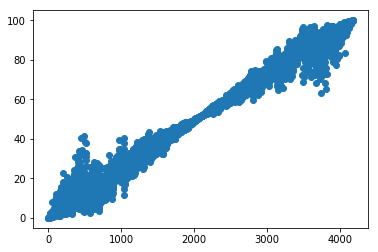

list_size = 4433


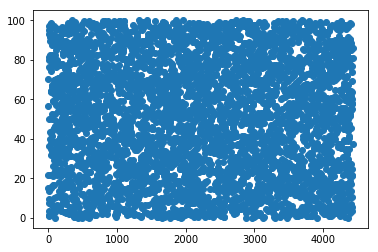

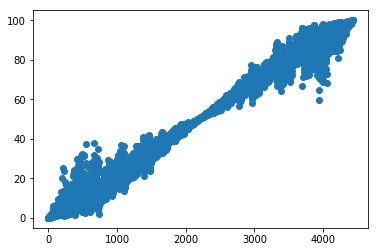

list_size = 4690


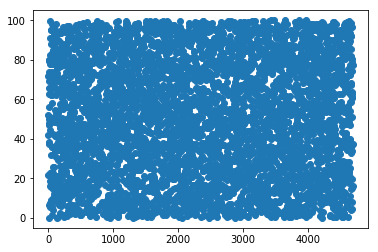

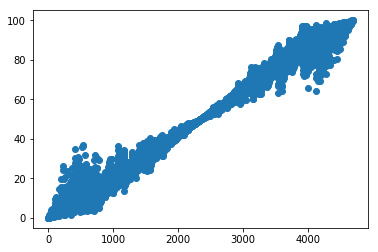

list_size = 4947


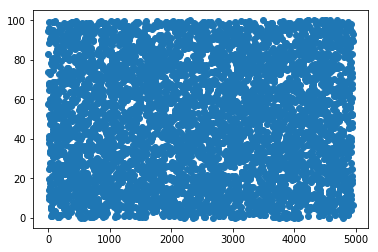

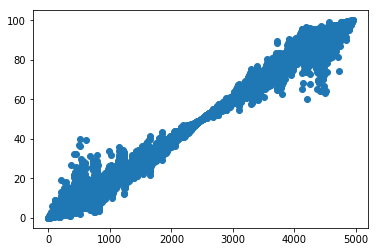

list_size = 5204


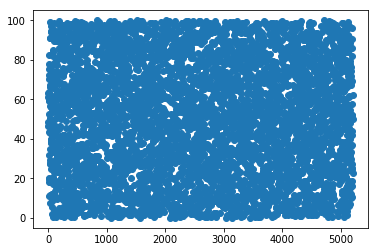

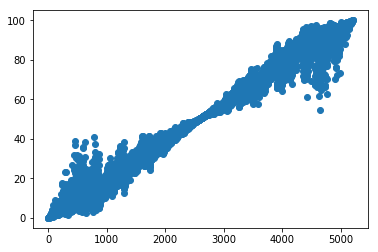

list_size = 5461


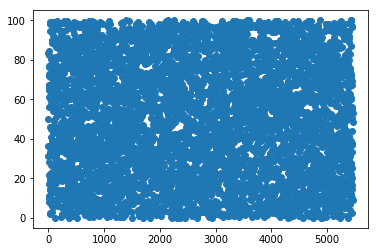

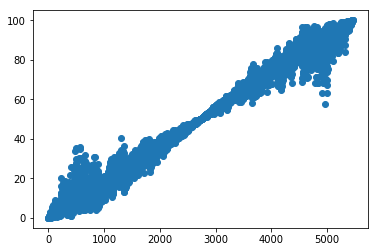

list_size = 5718


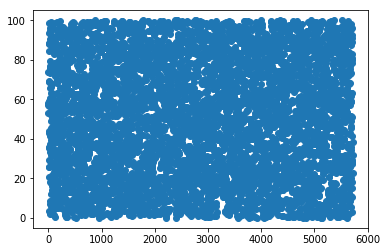

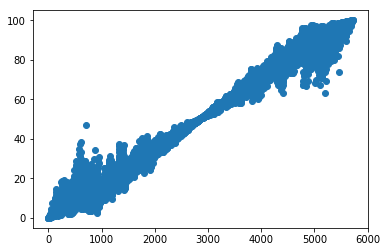

list_size = 5975


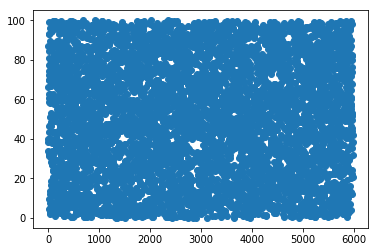

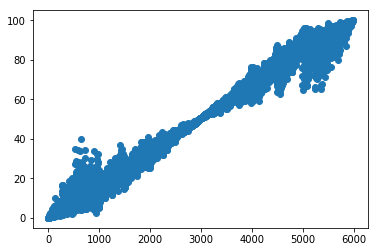

list_size = 6232


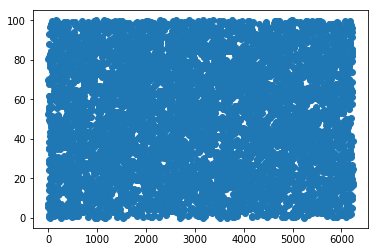

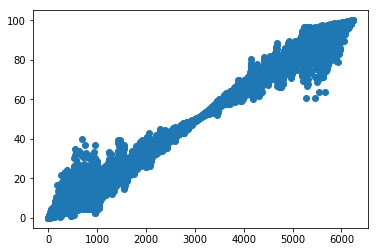

list_size = 6489


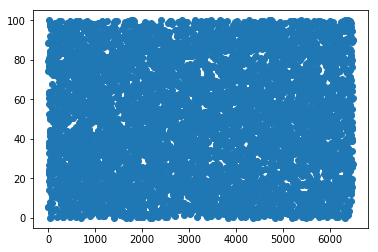

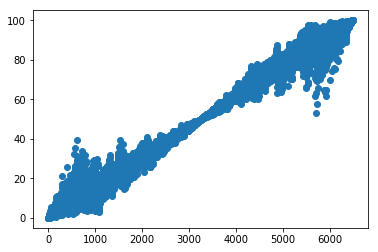

list_size = 6746


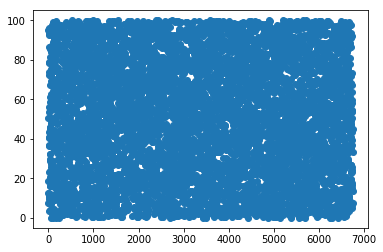

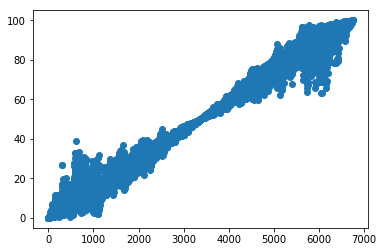

list_size = 7003


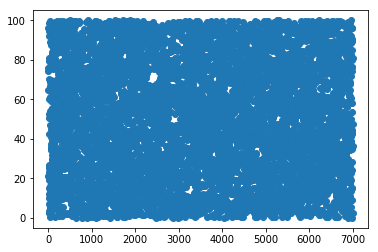

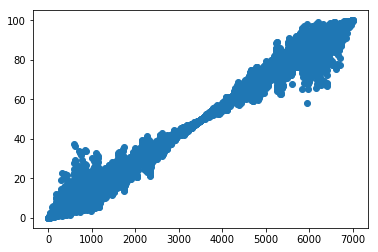

list_size = 7260


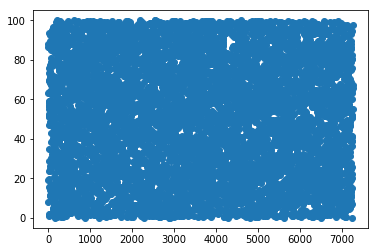

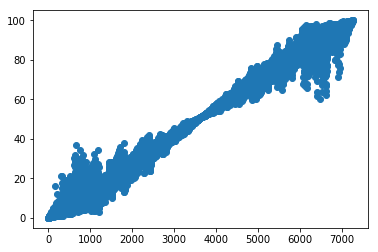

list_size = 7517


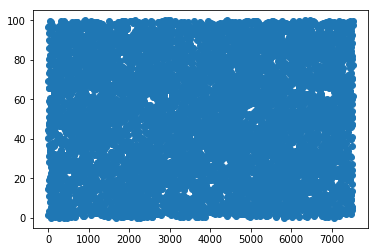

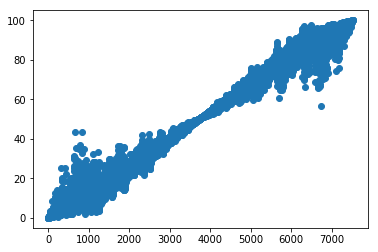

list_size = 7774


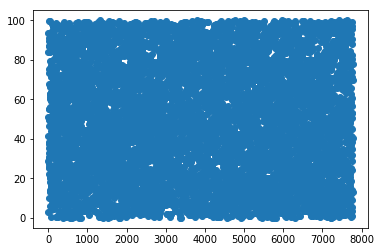

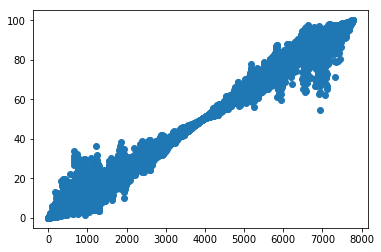

list_size = 8031


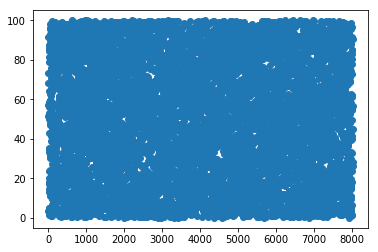

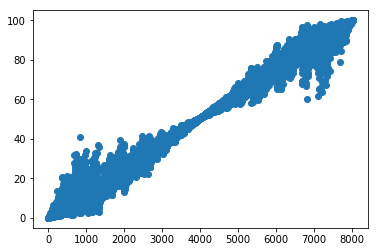

list_size = 8288


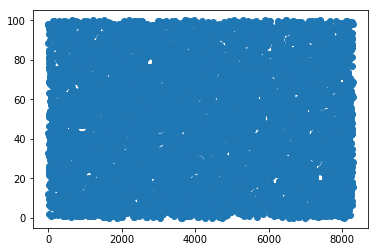

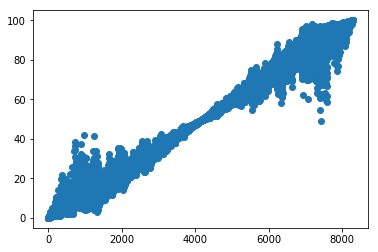

list_size = 8545


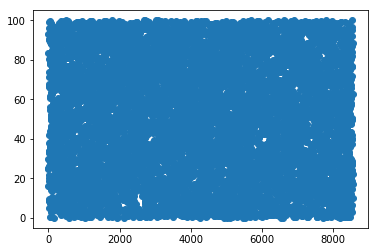

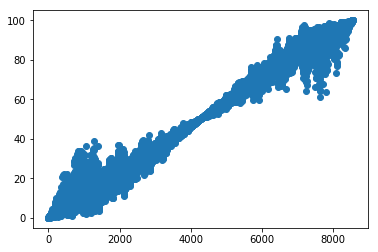

list_size = 8802


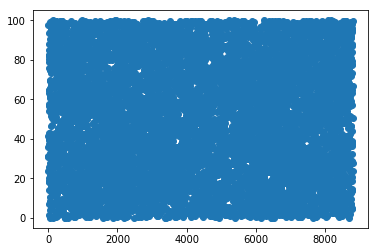

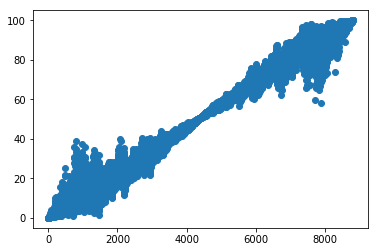

list_size = 9059


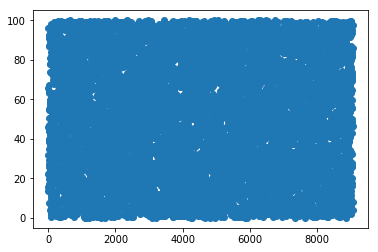

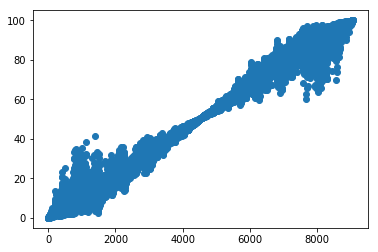

list_size = 9316


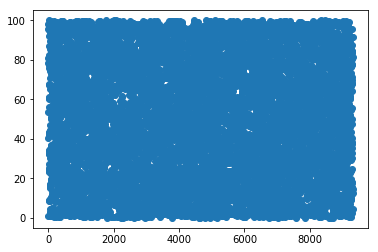

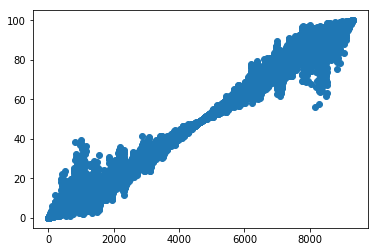

list_size = 9573


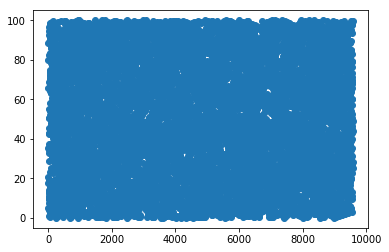

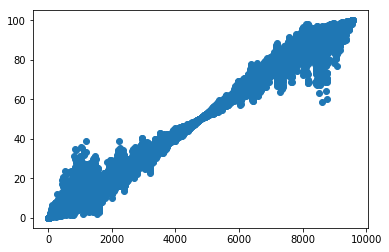

list_size = 9830


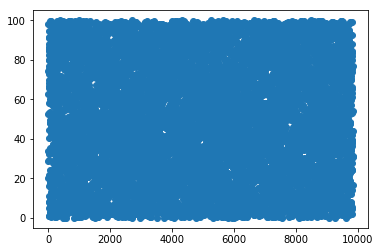

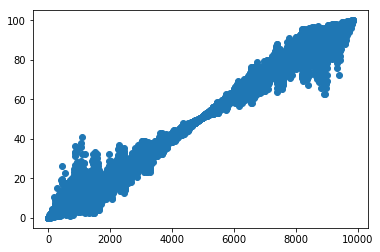

list_size = 10087


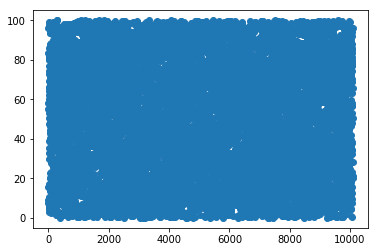

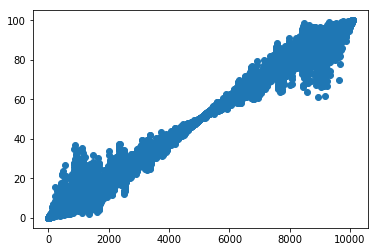

list_size = 10344


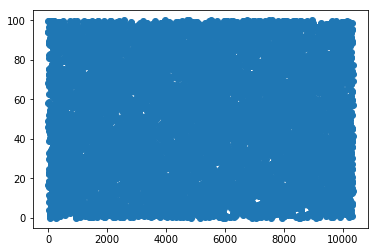

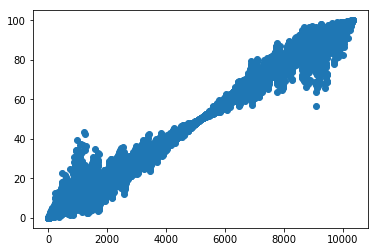

list_size = 10601


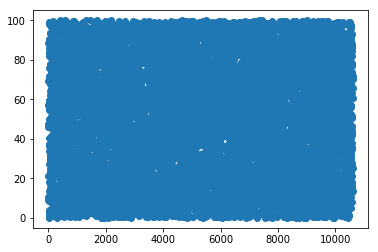

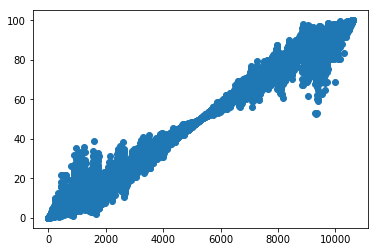

list_size = 10858


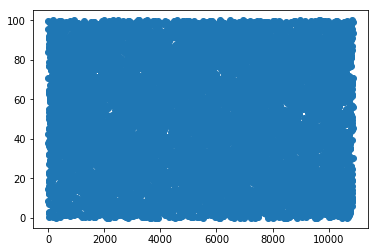

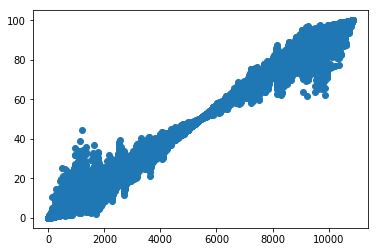

list_size = 11115


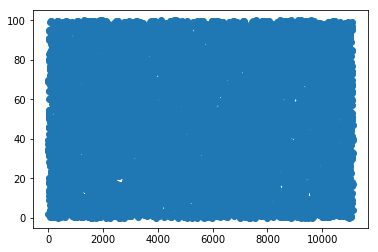

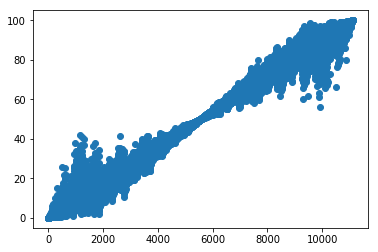

list_size = 11372


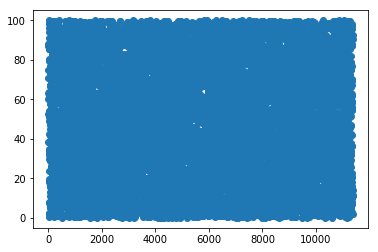

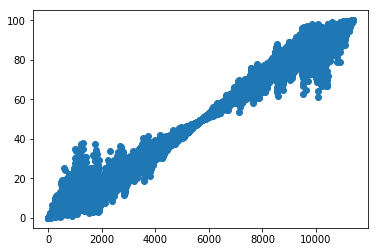

list_size = 11629


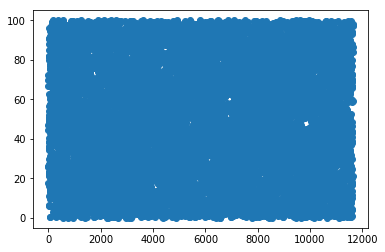

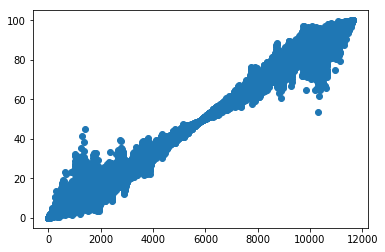

list_size = 11886


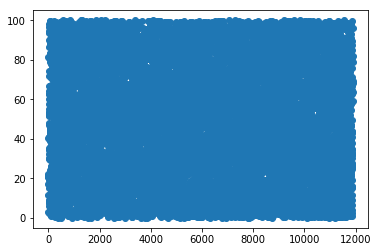

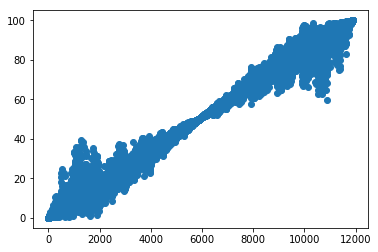

list_size = 12143


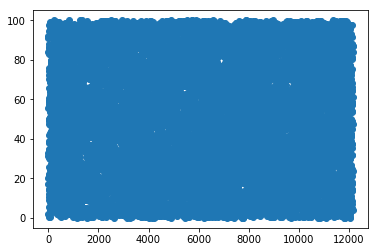

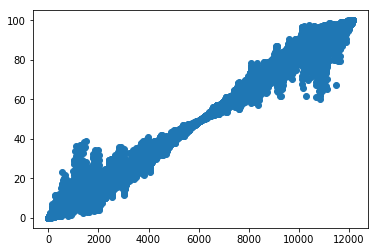

list_size = 12400


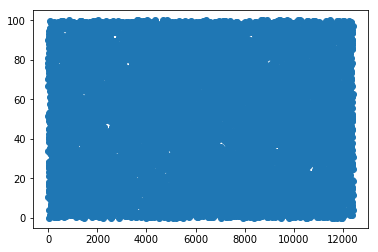

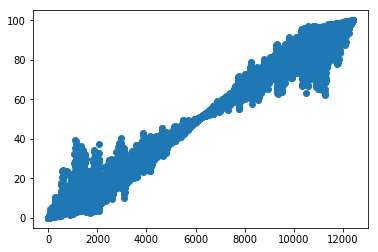

list_size = 12657


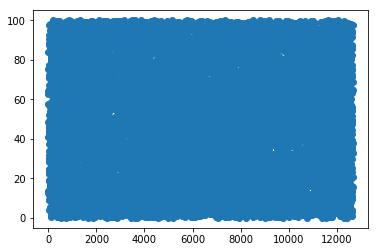

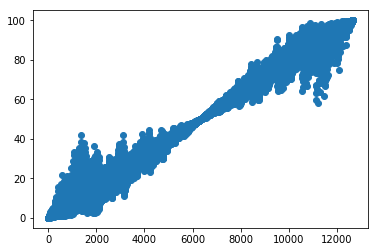

list_size = 12914


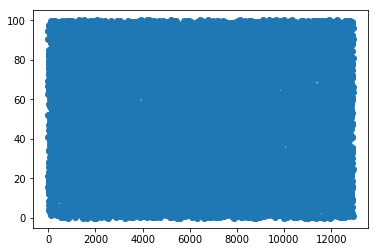

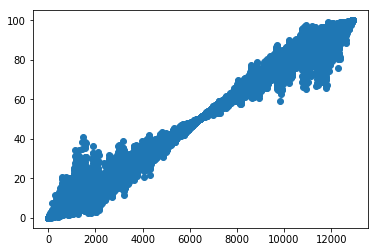

list_size = 13171


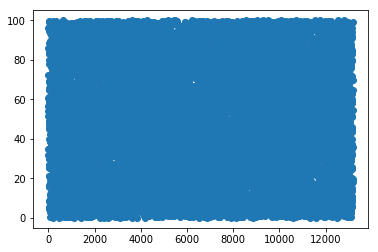

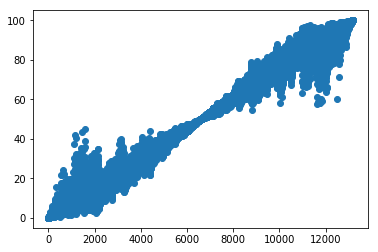

list_size = 13428


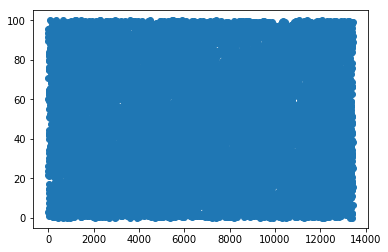

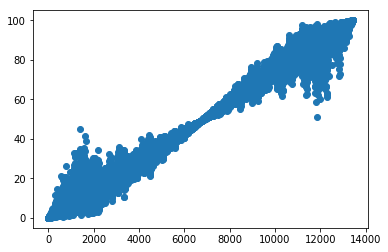

list_size = 13685


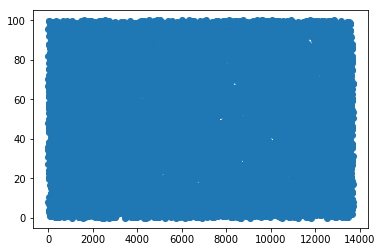

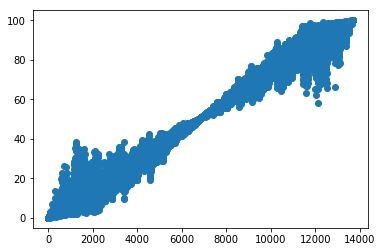

list_size = 13942


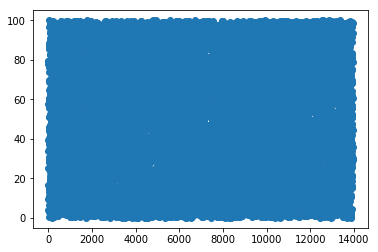

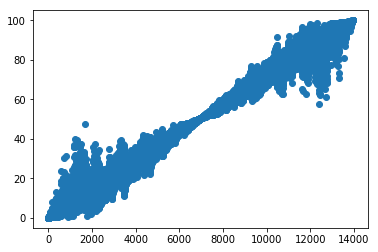

list_size = 14199


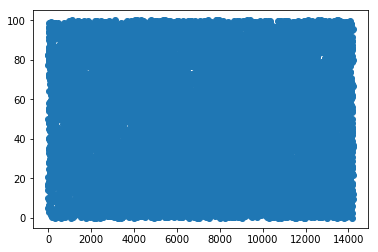

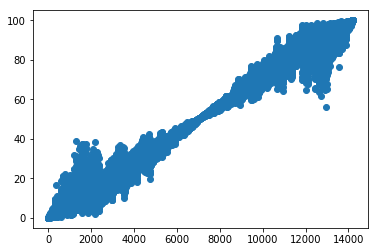

list_size = 14456


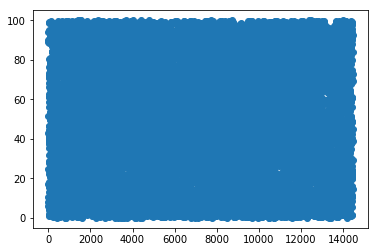

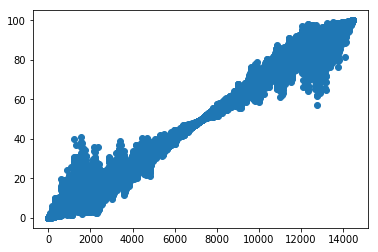

list_size = 14713


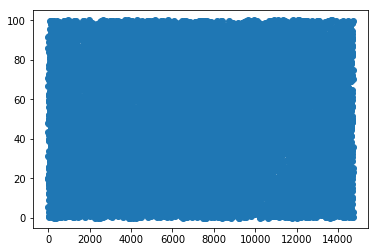

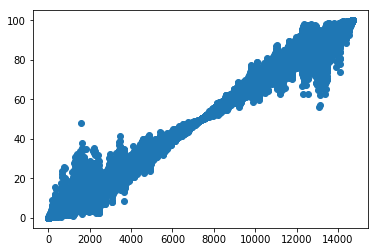

list_size = 14970


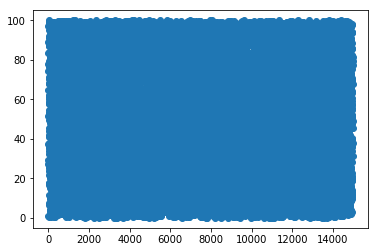

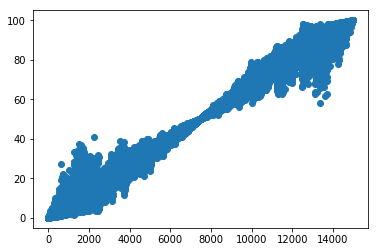

list_size = 15227


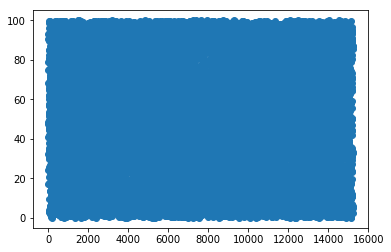

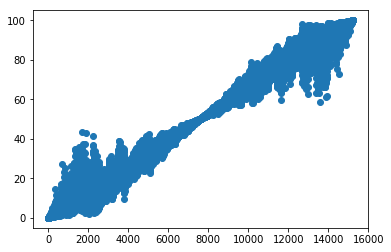

list_size = 15484


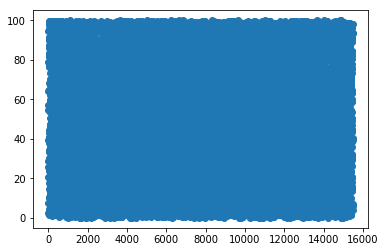

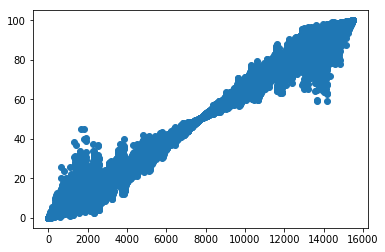

list_size = 15741


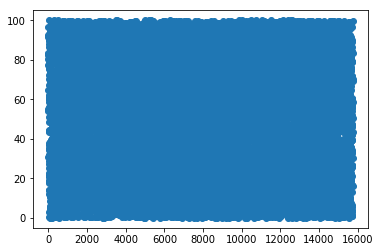

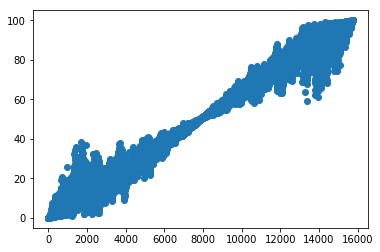

list_size = 15998


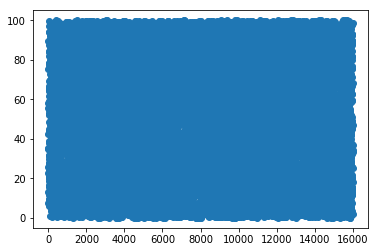

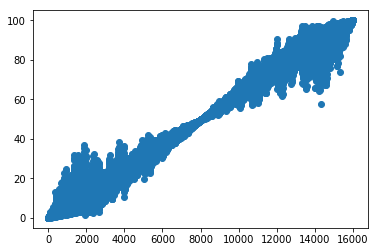

list_size = 16255


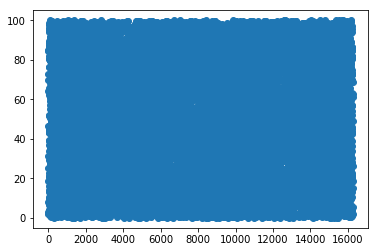

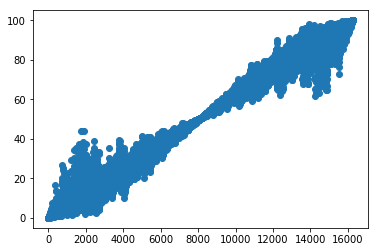

In [7]:
def StrongBiHeapifyWithOffset(li, start_offset, total_num_nodes):
    BiHeapifyWithOffset(li, start_offset, total_num_nodes)
    half_length = (total_num_nodes + 1) // 2
    BiHeapifyWithOffset(li, start_offset, half_length)
    BiHeapifyWithOffset(li, start_offset + (total_num_nodes // 2), half_length)
    BiHeapifyWithOffset(li, start_offset + (total_num_nodes // 4), total_num_nodes - 2 * (total_num_nodes//4));
    BiHeapifyWithOffset(li, start_offset, total_num_nodes)
    return

def StrongBiHeapifyInwardsWithOffset(li, start_offset, total_num_nodes):
    BiHeapifyInwardsWithOffset(li, start_offset, total_num_nodes)
    half_length = (total_num_nodes + 1) // 2
    BiHeapifyInwardsWithOffset(li, start_offset, half_length)
    BiHeapifyInwardsWithOffset(li, start_offset + (total_num_nodes // 2), half_length)
    BiHeapifyInwardsWithOffset(li, start_offset + (total_num_nodes // 4), 
                               total_num_nodes - 2 * (total_num_nodes//4));
    BiHeapifyInwardsWithOffset(li, start_offset, total_num_nodes)
    return

def MultipleStrongBiHeapifiesSymmetrcAboutMiddle(li, start_offset, total_num_nodes, offsets):
    offsets.sort()
    for i in offsets:
        if 2 * i >= total_num_nodes:
            continue
        StrongBiHeapifyWithOffset(li, start_offset + i, total_num_nodes - 2 * i)
    return 

def MultipleStrongBiHeapifiesInwardsSymmetrcAboutMiddle(li, start_offset, total_num_nodes, offsets):
    offsets.sort()
    for i in offsets:
        if 2 * i >= total_num_nodes:
            continue
        StrongBiHeapifyWithOffset(li, start_offset + i, total_num_nodes - 2 * i)
    return 

def BiHeapifyInwardsMedianApproximationAndPartitionWithOffset(li, start_offset, total_num_nodes):
    while total_num_nodes > 7:
        num_nodes_in_heap                = HeapSize(total_num_nodes)
        first_extended_in_node           = total_num_nodes - num_nodes_in_heap
        parent_of_first_extended_in_node = GetParentNotRoot(first_extended_in_node)
        last_node_in_pure_min_heap       = (total_num_nodes - 1) // 2
        parent_of_last_node_in_pure_min_heap = GetParentNotRoot(last_node_in_pure_min_heap)
        offsets = [0, parent_of_first_extended_in_node, parent_of_last_node_in_pure_min_heap]
        #MultipleStrongBiHeapifiesSymmetrcAboutMiddle(li, start_offset, total_num_nodes, offsets)
        MultipleStrongBiHeapifiesInwardsSymmetrcAboutMiddle(li, start_offset, total_num_nodes, offsets)
        start_offset                     = start_offset + first_extended_in_node
        total_num_nodes                  = num_nodes_in_heap - first_extended_in_node
    if total_num_nodes > 1:
          li[start_offset:start_offset + total_num_nodes] = sorted(li[start_offset:start_offset + total_num_nodes])
    return

def BiHeapifyInwardsMedianApproximationAndPartitionPlot():
    list_size_start = 2**6
    list_size_end = 2**14
    list_size_increment = 2**8 + 1
    list_size = list_size_start
    ratio = 0.25
    num_random_lists_per_vec_size = 2**0
    while list_size <= list_size_end:
        ints_list = [x for x in range(list_size)]
        for _ in range(num_random_lists_per_vec_size):
            print('list_size =', list_size)
            li = [100 * random.random() for _ in range(list_size)]
            plt.scatter(ints_list, li)
            plt.show()
            BiHeapifyInwardsMedianApproximationAndPartitionWithOffset(li, 0, list_size)
            plt.scatter(ints_list, li)
            plt.show()
        list_size += list_size_increment
    return 

BiHeapifyInwardsMedianApproximationAndPartitionPlot()
